<a href="https://colab.research.google.com/github/puttadharani/zomato-restaurant-clustering-and-sentiment-analysis-/blob/main/zomato_restaurant_clustering_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Suppress DeprecationWarnings related to ipykernel module
warnings.filterwarnings('ignore', category=DeprecationWarning, module='ipykernel')
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Import the os library
import os

# Set an environment variable to ignore specific DeprecationWarnings
os.environ['PYTHONWARNINGS'] = 'ignore::DeprecationWarning:ipykernel.ipkernel'


In [ ]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import math and time libraries
import math
import time

# Import Plotly and Plotly Express for interactive plotting
import plotly
import plotly.express as px

# Import WordCloud and STOPWORDS for text analysis
from wordcloud import WordCloud, STOPWORDS


In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#creating dataframes
restaurant_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter /Modules/Machine Learning/Projects/Unsupervised ML projects/Datasets/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter /Modules/Machine Learning/Projects/Unsupervised ML projects/Datasets/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# Restaurant dataset first look
restaurant_df

Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                                 ...    ...   
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 6 columns]

In [ ]:
# Reviews dataset first look
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Count of rows and columns in the restaurant datase
print(restaurant_df.shape)
print('restaurant_df has',restaurant_df.shape[0],'rows and',restaurant_df.shape[1],'columns.')

(105, 6)
restaurant_df has 105 rows and 6 columns.


In [ ]:
# Count of rows and columns in the reviews dataset
reviews_df.shape
print('reviews_df has',reviews_df.shape[0],'rows and',reviews_df.shape[1],'columns.')

reviews_df has 10000 rows and 7 columns.


### Dataset Information

In [ ]:
# Dataset Info
# Information about the restaurant dataset
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# Information about the reviews dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Count of duplicate values in the restaurant dataset
restaurant_df.duplicated().value_counts()

False    105
dtype: int64

In [ ]:
# Count of duplicate values in the reviews dataset
reviews_df.duplicated().value_counts()

False    9964
True       36
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Count of missing values in the restaurant dataset
restaurant_df.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Count of missing values in the reviews dataset
reviews_df.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

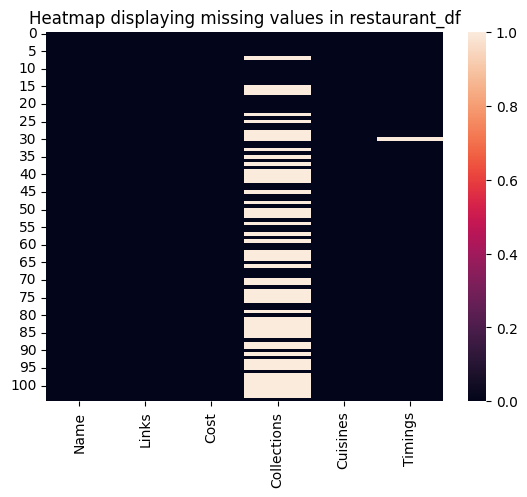

In [ ]:
# Visualizing the missing values in restaurant_df
sns.heatmap(restaurant_df.isna()).set(title='Heatmap displaying missing values in restaurant_df')
plt.show()

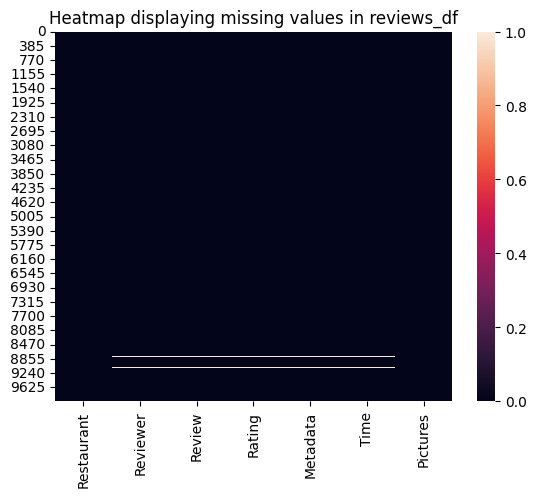

In [ ]:
# Visualizing the missing values in reviews_df
sns.heatmap(reviews_df.isna()).set(title='Heatmap displaying missing values in reviews_df')
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Displaying column names for the restaurant dataset
print('restaurant columns')
restaurant_df.columns

restaurant columns


Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# Displaying column names for the reviews dataset
print('reviews columns')
reviews_df.columns

reviews columns


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
# Displaying descriptive statistics for restaurant_df
restaurant_df.describe(include='all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [ ]:
# Displaying descriptive statistics for reviews_df
reviews_df.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

**variables description of restaurant_df:**<br>
Name : Name of Restaurants<br>

Links : URL Links of Restaurants<br>

Cost : Per person estimated cost of dining
<br>

Collection : Tagging of Restaurants w.r.t. Zomato categories<br>

Cuisines : Cuisines served by restaurants<br>

Timings : Restaurant timings<br>
<br>
**variables description of reviews_df:**<br>
Reviewer : Name of the reviewer<br>

review : Review text<br>

Rating : Rating provided<br>

MetaData : Reviewer metadata-No of reviews and followers<br>

Time : Date and Time of Review<br>

Pictures : No of pictures posted with review


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check unique values for each variable in restaurants_df
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [ ]:
# Check unique values for each variable in reviews_df
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

#***3.Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
# Replacing 'Like' with the value 1 in the 'Rating' column of 'reviews_df'
reviews_df.loc[reviews_df['Rating'] == 'Like'] = 1



In [ ]:
# Filling missing values in the 'Rating' column of 'reviews_df' with the median
reviews_df['Rating'].fillna(reviews_df['Rating'].median(),inplace=True)

In [ ]:
#finding dupilcates in reviews_df
reviews_df[reviews_df.duplicated()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0

In [ ]:
# Removing duplicate rows from 'reviews_df'
reviews=reviews_df.drop_duplicates(inplace=True)

In [ ]:
# Checking for duplicate rows in the 'restaurant_df' dataset
restaurant_df.duplicated().sum()

0

In [ ]:
# Calculating the percentage of missing values in the 'Collections' column
missing_percentage = ((restaurant_df['Collections'].isnull().sum()) / (len(restaurant_df['Collections']))) * 100

# Print the percentage of missing values in the 'Collections' column rounded to two decimal places.
print(f'Percentage of missing value in collections is {round(missing_percentage, 2)}%')

Percentage of missing value in collections is 51.43%


In [ ]:
# Creating a copy of the 'restaurant_df' dataset
restaurants=restaurant_df.copy()

In [ ]:
# Renaming the 'Name' column in 'restaurant_df' to 'Restaurant'
restaurant_df.rename(columns={'Name':'Restaurant'},inplace=True)

In [ ]:
# Merging the 'restaurant_df' and 'reviews_df' datasets on the 'Restaurant' column
_merged_df=restaurant_df.merge(reviews_df,on='Restaurant')

In [ ]:
# Renaming columns in the merged dataset
_merged_df.rename(columns={'Timings':'Restaurant_timings'},inplace=True)

In [ ]:
# Checking for missing values in the merged dataset
_merged_df.isna().sum()

Restaurant               0
Links                    0
Cost                     0
Collections           4999
Cuisines                 0
Restaurant_timings     100
Reviewer                 2
Review                   9
Rating                   0
Metadata                 2
Time                     2
Pictures                 0
dtype: int64

In [ ]:
# Finding the highest and lowest prices in the 'Cost' column
print('The highest price among the restaurants= ',_merged_df['Cost'].max())
print('The lowest price among the restaurants= ',_merged_df['Cost'].min())

The highest price among the restaurants=  900
The lowest price among the restaurants=  1,000


In [ ]:
# removing commas in the 'Cost' column
_merged_df['Cost']=_merged_df['Cost'].apply(lambda x:x.replace(',',''))

In [ ]:
#converting 'Cost' column values to integer
_merged_df['Cost']=_merged_df['Cost'].astype(int)


In [ ]:
_merged_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750])

In [ ]:
# Converting the 'Rating' column to a float data type
_merged_df['Rating']=_merged_df['Rating'].astype('float')

In [ ]:
# Counting the number of ratings for each rating value
_merged_df['Rating'].value_counts()

5.0    3832
4.0    2375
1.0    1735
3.0    1193
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [ ]:
# Selecting costly restaurants with a cost greater than 1000
costly_restaurants=_merged_df[_merged_df['Cost']>1000].reset_index()
costly_restaurants.head()

index Restaurant                                              Links  Cost  \
0    200   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
1    201   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
2    202   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3    203   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
4    204   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   

                          Collections  \
0  Great Buffets, Hyderabad's Hottest   
1  Great Buffets, Hyderabad's Hottest   
2  Great Buffets, Hyderabad's Hottest   
3  Great Buffets, Hyderabad's Hottest   
4  Great Buffets, Hyderabad's Hottest   

                                       Cuisines  \
0  Asian, Mediterranean, North Indian, Desserts   
1  Asian, Mediterranean, North Indian, Desserts   
2  Asian, Mediterranean, North Indian, Desserts   
3  Asian, Mediterranean, North Indian, Desserts   
4  Asian, Mediterranean, North Indian, Desserts   

                      Restaurant_timings          Reviewer  \
0  11:30 AM to 4:30 PM, 6:30 PM to 11 PM     Vivek Vuppala   
1  11:30 AM to 4:30 PM, 6:30 PM to 11 PM       Jalaj Goyal   
2  11:30 AM to 4:30 PM, 6:30 PM to 11 PM        Teju Winni   
3  11:30 AM to 4:30 PM, 6:30 PM to 11 PM    Karthik Chanda   
4  11:30 AM to 4:30 PM, 6:30 PM to 11 PM  Samujjwal Baruah   

                                              Review  Rating  \
0  We were 4 people who visited this place on Thu...     2.0   
1  Here is one of the best buffet places for team...     4.0   
2  Starters were very tastiest. Good place to cho...     5.0   
3  Best Restaurant with great food, Satyajit & Te...     5.0   
4  Would have rated 6, +1 for the music, had it n...     5.0   

                    Metadata             Time  Pictures  
0   2 Reviews , 40 Followers  5/24/2019 21:17         0  
1  16 Reviews , 71 Followers  5/24/2019 15:09         3  
2                   1 Review  5/23/2019 14:59         0  
3                   1 Review  5/22/2019 23:18         0  
4    2 Reviews , 2 Followers  5/22/2019 16:01         0

In [ ]:
# Counting the number of costly restaurants
print('there are',costly_restaurants['Restaurant'].nunique(),'costly restaurants')

there are 31 costly restaurants


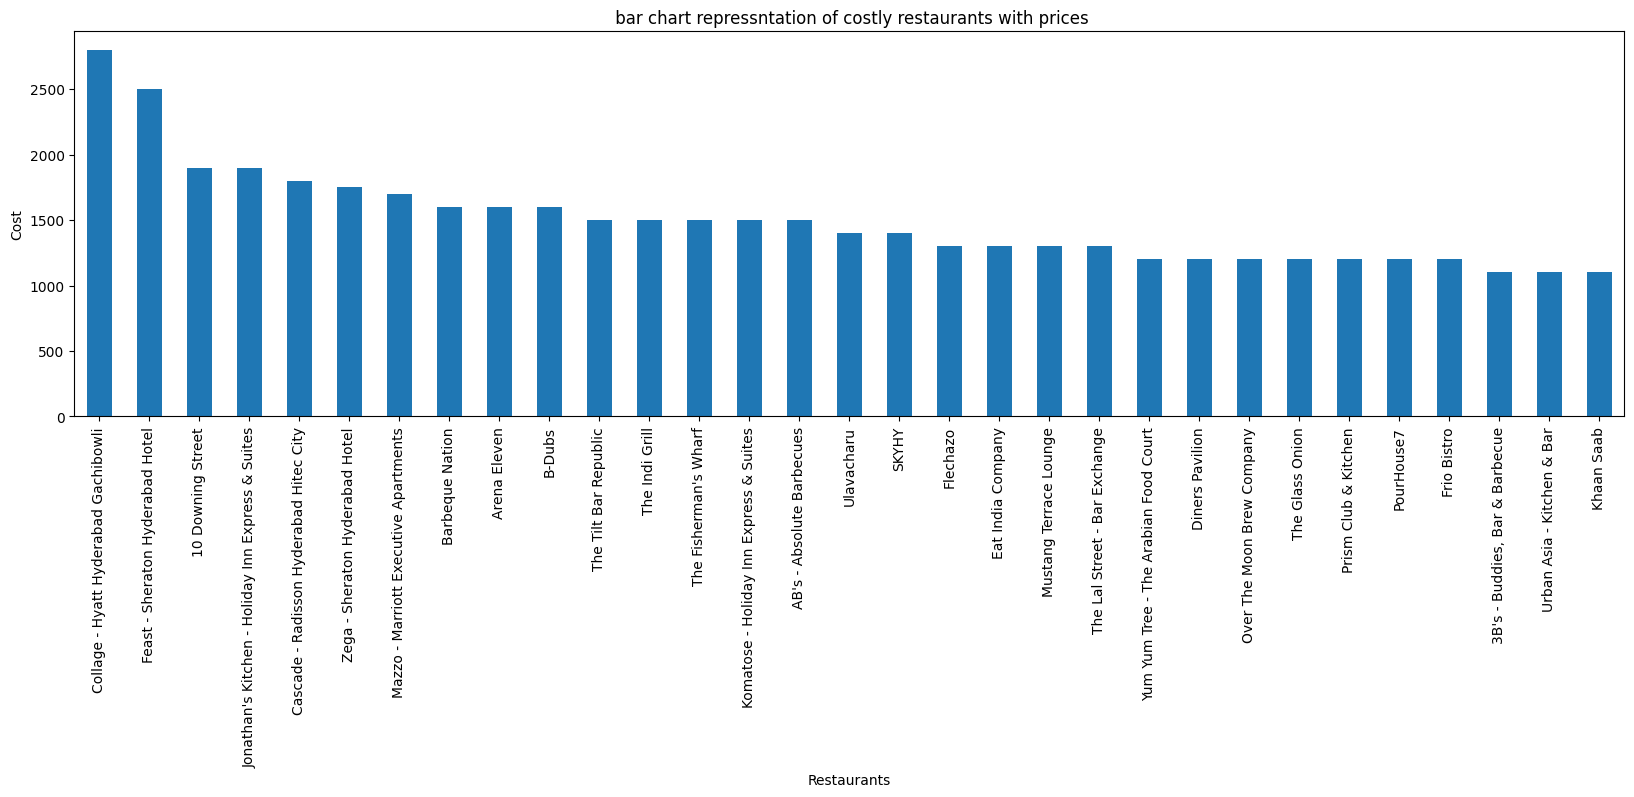

In [ ]:
# Creating a bar chart of costly restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart repressntation of costly restaurants with prices')
costly_restaurants.groupby(costly_restaurants['Restaurant'])['Cost'].max().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Listing the top 5 costly restaurants
top5_costlty_restaurants=['Collage - Hyatt Hyderabad Gachibowli','Feast - Sheraton Hyderabad Hotel','10 Downing Street',"Jonathan's Kitchen - Holiday Inn Express & Suites",'Cascade - Radisson Hyderabad Hitec City']
print('the top 5 costly restaurants are:',top5_costlty_restaurants)


the top 5 costly restaurants are: ['Collage - Hyatt Hyderabad Gachibowli', 'Feast - Sheraton Hyderabad Hotel', '10 Downing Street', "Jonathan's Kitchen - Holiday Inn Express & Suites", 'Cascade - Radisson Hyderabad Hitec City']


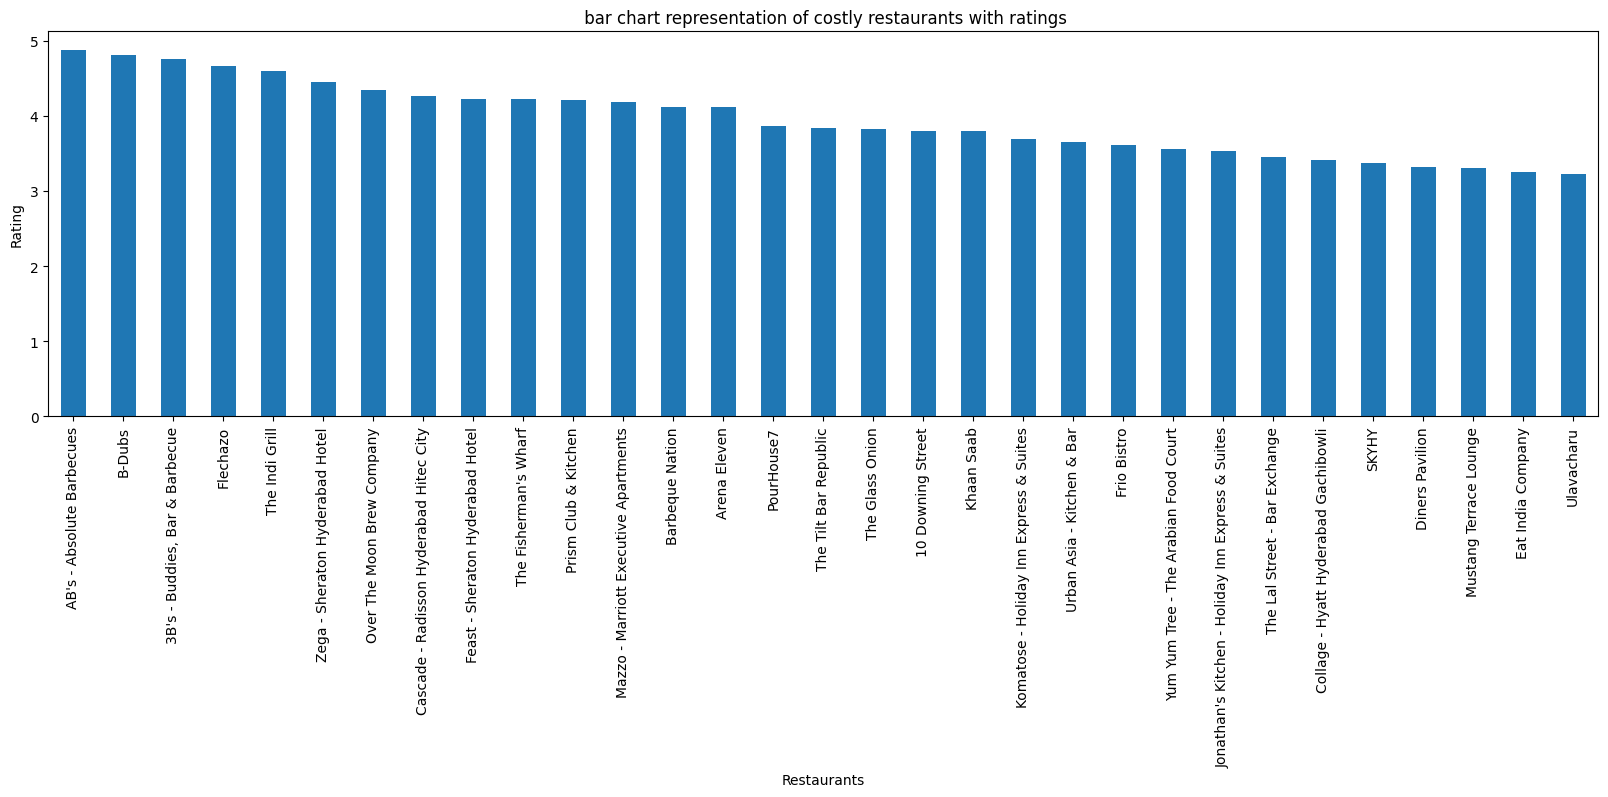

In [ ]:
# Creating a bar chart of costly restaurants with ratings
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of costly restaurants with ratings')
costly_restaurants.groupby(costly_restaurants['Restaurant'])['Rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Calculating the average rating of costly restaurants
print('the average rating of costly restaurants=',round(costly_restaurants['Rating'].mean(),2))

the average rating of costly restaurants= 3.95


In [ ]:
# Selecting budget-friendly restaurants with a cost between 500 and 1000
budget_friendly_restaurants=_merged_df[(_merged_df['Cost']>500)&(_merged_df['Cost']<=1000)]
budget_friendly_restaurants.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                              Restaurant_timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
# Calculating the average cost of budget-friendly restaurants
print('the average cost of budget_friendly_restaurants=',round(budget_friendly_restaurants['Cost'].mean(),2))

the average cost of budget_friendly_restaurants= 746.98


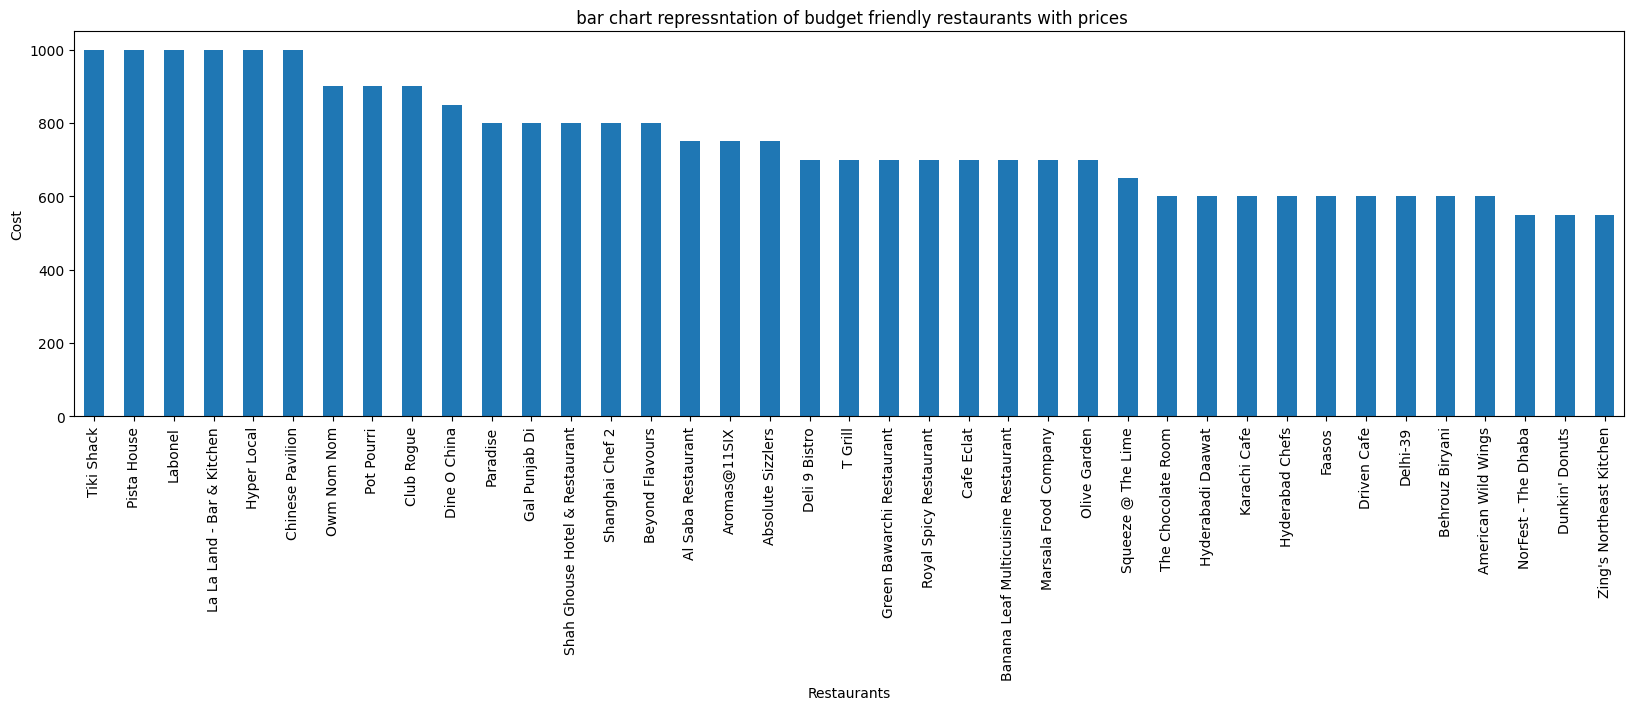

In [ ]:
# Creating a bar chart of budget-friendly restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart repressntation of budget friendly restaurants with prices')
budget_friendly_restaurants.groupby(budget_friendly_restaurants['Restaurant'])['Cost'].max().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Calculating the average rating of budget-friendly restaurants
print('the average rating of budget_friendly restaurants=',round(budget_friendly_restaurants['Rating'].mean(),2))

the average rating of budget_friendly restaurants= 3.52


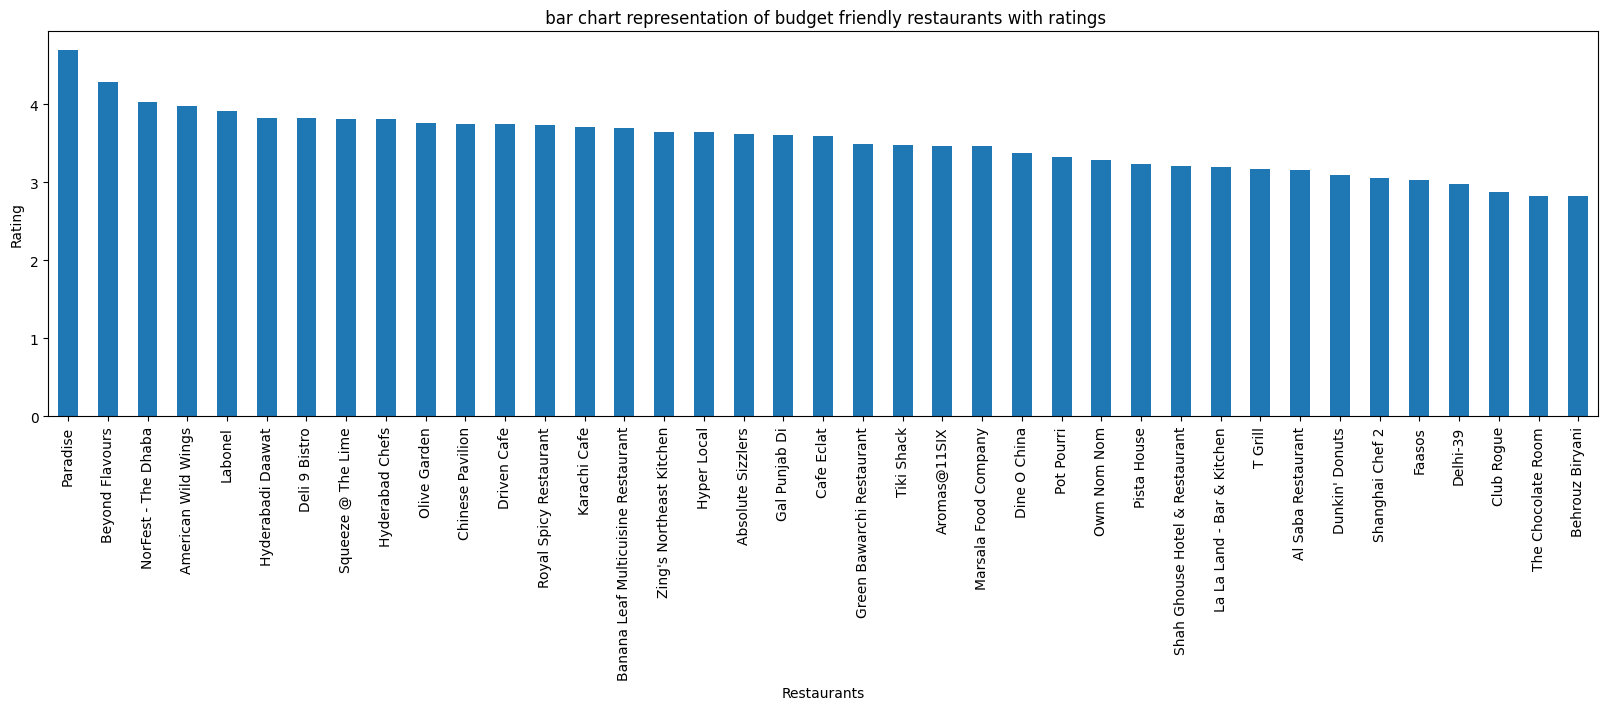

In [ ]:
# Creating a bar chart of budget-friendly restaurants with ratings
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of budget friendly restaurants with ratings')
budget_friendly_restaurants.groupby(budget_friendly_restaurants['Restaurant'])['Rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Creating a dictionary of average ratings for each restaurant
restaurants_rating=dict(_merged_df.groupby(_merged_df['Restaurant'])['Rating'].mean().round(1))

restaurants_rating

{'10 Downing Street': 3.8,
 '13 Dhaba': 3.5,
 "3B's - Buddies, Bar & Barbecue": 4.8,
 "AB's - Absolute Barbecues": 4.9,
 'Absolute Sizzlers': 3.6,
 'Al Saba Restaurant': 3.2,
 'American Wild Wings': 4.0,
 'Amul': 3.9,
 'Arena Eleven': 4.1,
 'Aromas@11SIX': 3.5,
 'Asian Meal Box': 2.6,
 'B-Dubs': 4.8,
 'Banana Leaf Multicuisine Restaurant': 3.7,
 'Barbeque Nation': 4.1,
 'Behrouz Biryani': 2.8,
 'Being Hungry': 3.7,
 'Beyond Flavours': 4.3,
 'Biryanis And More': 3.7,
 'Cafe Eclat': 3.6,
 'Cascade - Radisson Hyderabad Hitec City': 4.3,
 'Chinese Pavilion': 3.7,
 'Club Rogue': 2.9,
 'Collage - Hyatt Hyderabad Gachibowli': 3.4,
 'Cream Stone': 3.8,
 'Delhi-39': 3.0,
 'Deli 9 Bistro': 3.8,
 'Desi Bytes': 2.9,
 'Dine O China': 3.4,
 'Diners Pavilion': 3.3,
 "Domino's Pizza": 3.1,
 'Driven Cafe': 3.7,
 "Dunkin' Donuts": 3.1,
 'Eat India Company': 3.3,
 'Faasos': 3.0,
 'Feast - Sheraton Hyderabad Hotel': 4.2,
 'Flechazo': 4.7,
 'Frio Bistro': 3.6,
 "GD's": 4.0,
 'Gal Punjab Di': 3.6,
 'Green B

In [ ]:
# Updating the 'Rating' column in the merged dataset with the average ratings
_merged_df['Rating']=_merged_df['Restaurant'].map(restaurants_rating)
_merged_df.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                              Restaurant_timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     4.3   
1  Ambience is too good for a pleasant evening. S...     4.3   
2  A must try.. great food great ambience. Thnx f...     4.3   
3  Soumen das and Arun was a great guy. Only beca...     4.3   
4  Food is good.we ordered Kodi drumsticks and ba...     4.3   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
# Selecting top-rated restaurants with a rating greater than 4
top_rated_restaurants=_merged_df[_merged_df['Rating']>4]
top_rated_restaurants.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                              Restaurant_timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     4.3   
1  Ambience is too good for a pleasant evening. S...     4.3   
2  A must try.. great food great ambience. Thnx f...     4.3   
3  Soumen das and Arun was a great guy. Only beca...     4.3   
4  Food is good.we ordered Kodi drumsticks and ba...     4.3   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

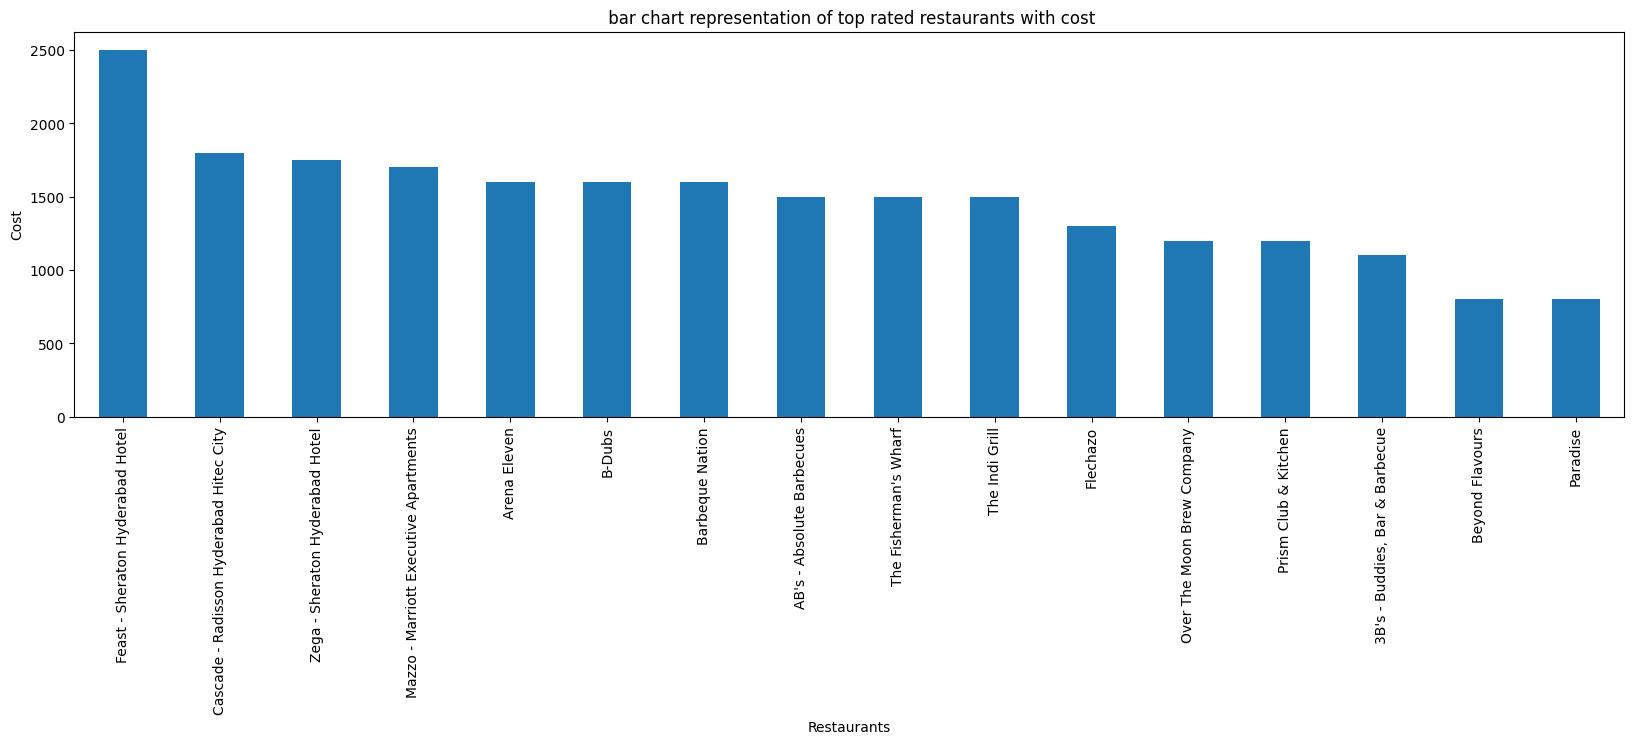

In [ ]:
# Creating a bar chart of top-rated restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of top rated restaurants with cost')
top_rated_restaurants.groupby(top_rated_restaurants['Restaurant'])['Cost'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Counting the number of top-rated restaurants
print('there are',top_rated_restaurants['Restaurant'].nunique(),'top rated restaurants')

there are 16 top rated restaurants


In [ ]:
# Selecting good-rated restaurants with a rating between 3 and 4
good_rated_restaurants=_merged_df[(_merged_df['Rating']>3)&(_merged_df['Rating']<=4)]
good_rated_restaurants.head()

Restaurant  \
300  Shah Ghouse Hotel & Restaurant   
301  Shah Ghouse Hotel & Restaurant   
302  Shah Ghouse Hotel & Restaurant   
303  Shah Ghouse Hotel & Restaurant   
304  Shah Ghouse Hotel & Restaurant   

                                                 Links  Cost  \
300  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
301  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
302  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
303  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
304  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   

                Collections  \
300  Late Night Restaurants   
301  Late Night Restaurants   
302  Late Night Restaurants   
303  Late Night Restaurants   
304  Late Night Restaurants   

                                              Cuisines Restaurant_timings  \
300  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   
301  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   
302  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   
303  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   
304  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   

            Reviewer                                             Review  \
300     Ashwi Sharma  Haleem, the best place to try out.\nAvaialble ...   
301  Dasthagir Shaik  Ordered Chicken Fried rice. Very good; however...   
302     Ram Chowdary  Wonderful place with good food taste i like th...   
303        Avn Patro  This time I have experienced Mandi it's very n...   
304            Vinay  Nice taste of Biryani, and the price was also ...   

     Rating                 Metadata             Time  Pictures  
300     3.2  10 Reviews , 1 Follower  5/25/2019 18:32         0  
301     3.2                 1 Review  5/24/2019 21:48         0  
302     3.2                 1 Review  5/24/2019 18:37         0  
303     3.2                 1 Review  5/24/2019 17:33         0  
304     3.2                 1 Review   5/24/2019 3:01         0

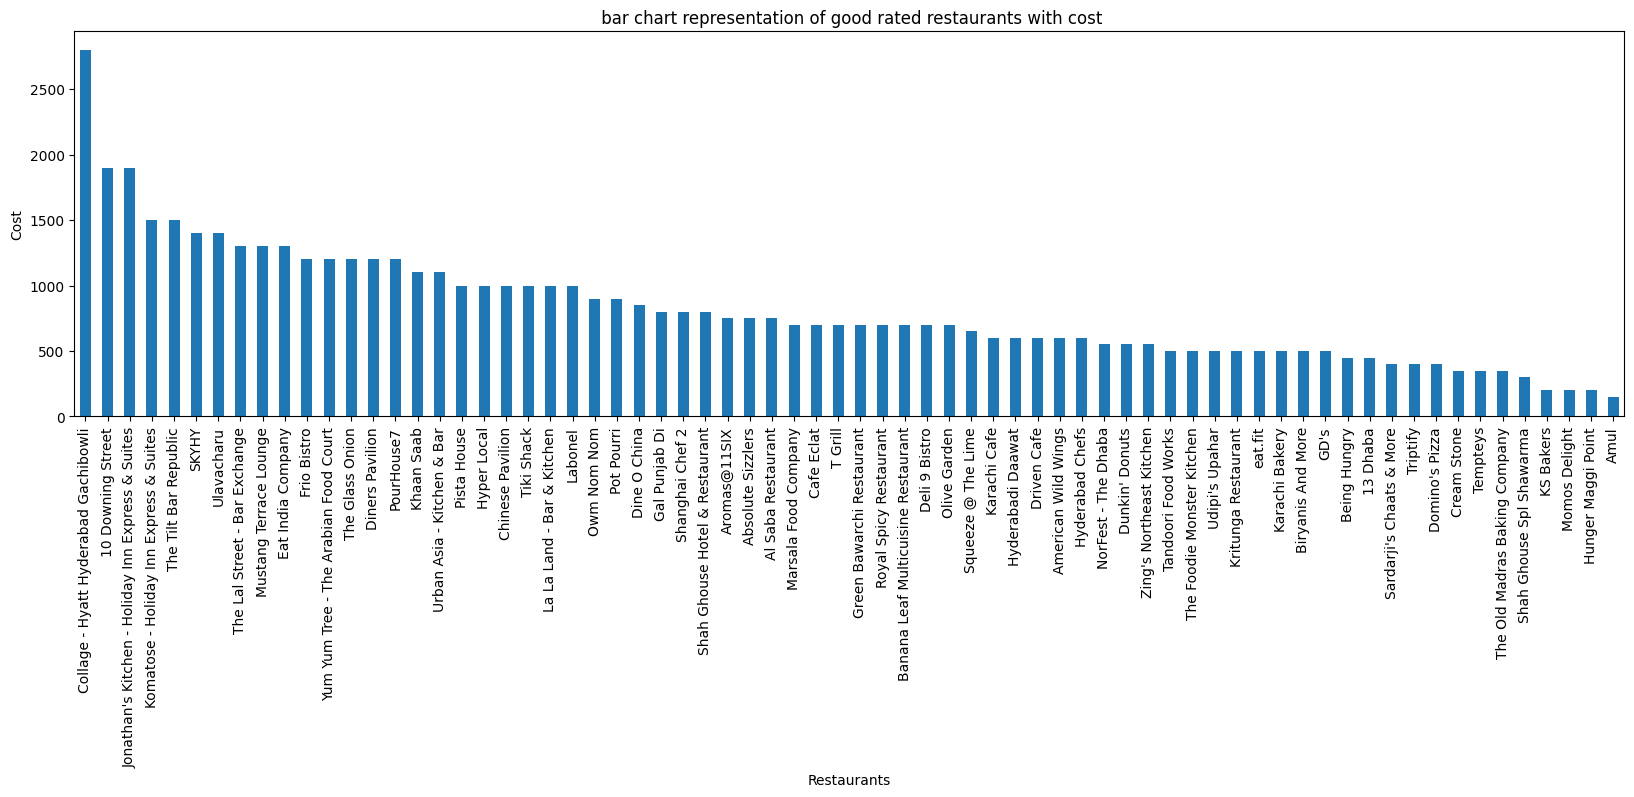

In [ ]:
# Creating a bar chart of good-rated restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of good rated restaurants with cost')
good_rated_restaurants.groupby(good_rated_restaurants['Restaurant'])['Cost'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Counting the number of good-rated restaurants
print('there are',good_rated_restaurants['Restaurant'].nunique(),'good_rated restaurants')

there are 70 good_rated restaurants


In [ ]:
# Selecting low-rated restaurants with a rating less than 3
low_rated_restaurants=_merged_df[_merged_df['Rating']<3]
low_rated_restaurants.head()

Restaurant                                            Links  Cost  \
1500        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   
1501        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   
1502        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   
1503        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   
1504        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   

     Collections           Cuisines Restaurant_timings            Reviewer  \
1500         NaN  Burger, Fast Food     11 AM to 11 PM       Kirthi Kirthi   
1501         NaN  Burger, Fast Food     11 AM to 11 PM        Amrita Sahoo   
1502         NaN  Burger, Fast Food     11 AM to 11 PM  Atei Jenny Uo Chon   
1503         NaN  Burger, Fast Food     11 AM to 11 PM    BABA RIYAZ SHAIK   
1504         NaN  Burger, Fast Food     11 AM to 11 PM               Tiger   

                                                 Review  Rating  \
1500  Good atmosphere to eat with relax.tastes good....     2.8   
1501  Ordered zinger doubles and hot and crispy chic...     2.8   
1502  No words very very very bad service I ever had...     2.8   
1503  chicken peaces not frided properally....and qu...     2.8   
1504  Burger was okay....But the chicken piece was n...     2.8   

                      Metadata             Time  Pictures  
1500   10 Reviews , 1 Follower  5/22/2019 17:21         0  
1501                 8 Reviews  5/18/2019 20:52         0  
1502  12 Reviews , 8 Followers   5/15/2019 1:48         0  
1503                  1 Review   5/8/2019 21:11         1  
1504     1 Review , 1 Follower   5/4/2019 21:47         0

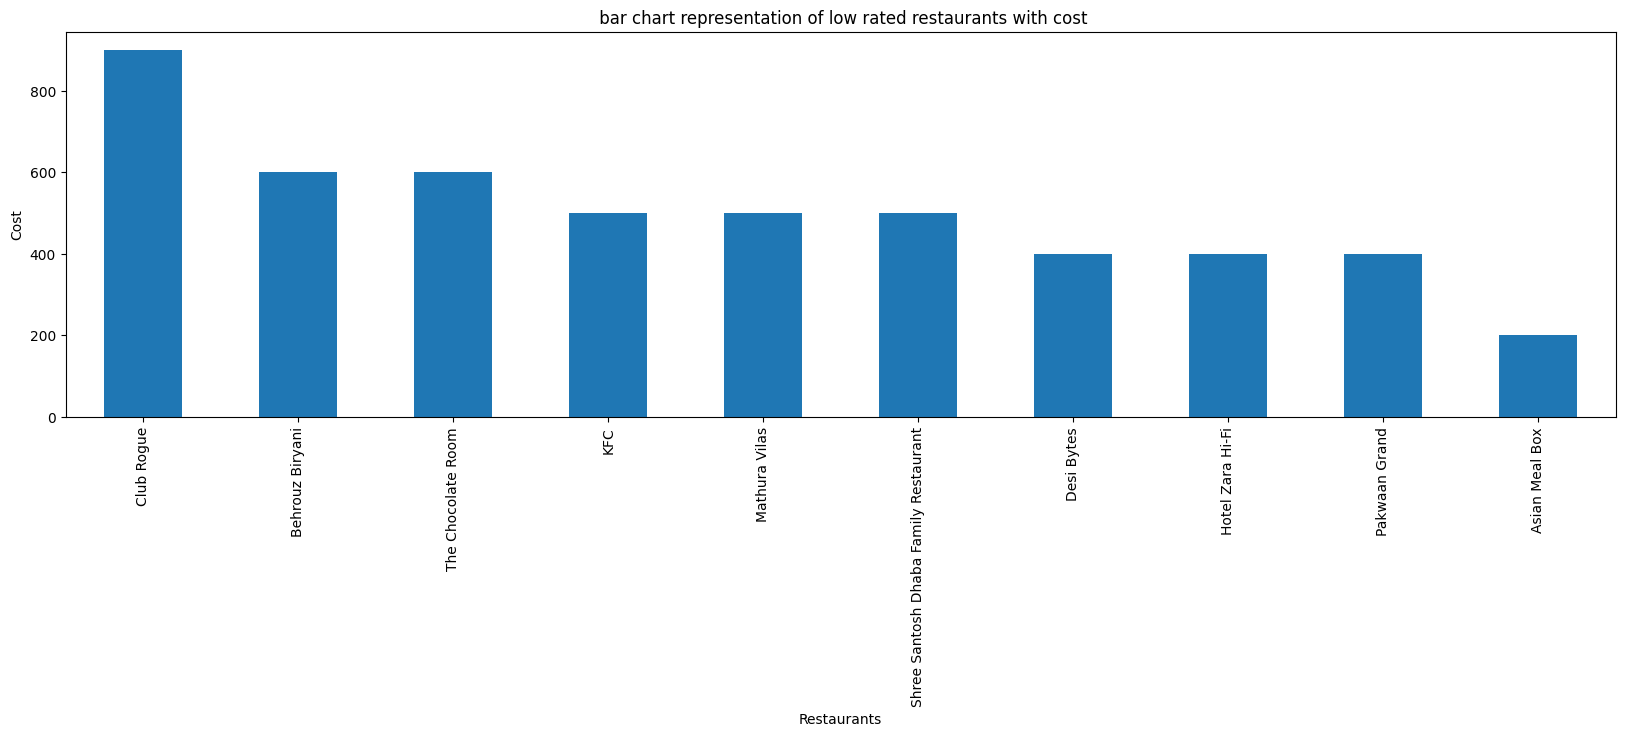

In [ ]:
# Creating a bar chart of low-rated restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of low rated restaurants with cost')
low_rated_restaurants.groupby(low_rated_restaurants['Restaurant'])['Cost'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Counting the number of unique reviewers who have reviewed the restaurants
print(_merged_df['Reviewer'].nunique(),' reviewers have reviewed the restaurants')
_merged_df['Reviewer'].value_counts()

7446  reviewers have reviewed the restaurants


Ankita              13
Parijat Ray         13
Kiran               12
Jay Mehta           11
Vedant Killa        11
                    ..
Anjana Dandekar      1
Shailesh Agarwal     1
Vinaya Chekuri       1
Sonal Ambani         1
Bhargava Krishna     1
Name: Reviewer, Length: 7446, dtype: int64

In [ ]:
# Counting the number of reviews by each reviewer
_merged_df.isna().sum()

Restaurant               0
Links                    0
Cost                     0
Collections           4999
Cuisines                 0
Restaurant_timings     100
Reviewer                 2
Review                   9
Rating                   0
Metadata                 2
Time                     2
Pictures                 0
dtype: int64

from the above cell we can observe that most of the restaurants were reviewed.This helps restaurants to improve.

### What all manipulations have you done and insights you found?

changed datatypes of columns, Filtered restaurants based on cost and ratings and created dataframes accordingly. found out number of values, unique values and value counts in each column. Also merged both the dataframes.null values exist in both the datasets and they will be managed accordingly

### Reviews

In [ ]:
review = reviews_df.copy()


In [ ]:
# Check the values of Rating feature in order to change the datatype
review.Rating.value_counts()

5      3832
4      2373
1      1735
3      1193
2       684
4.5      69
3.5      47
2.5      19
1.5       9
4.0       2
1         1
Name: Rating, dtype: int64

In [ ]:
review.loc[review['Rating'] == 'Like'] = 0
review['Rating'] = review['Rating'].astype('float')

review.loc[review['Rating'] == 0] = review.Rating.median()

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9964 non-null   object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9964 non-null   float64
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    9964 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.8+ KB


In [ ]:
review.head(3)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0

In [ ]:
review['Metadata'].unique()

array(['1 Review , 2 Followers', '3 Reviews , 2 Followers',
       '2 Reviews , 3 Followers', ..., '65 Reviews , 423 Followers',
       '13 Reviews , 144 Followers', '472 Reviews , 1302 Followers'],
      dtype=object)

In [ ]:
review['Time'].unique()

array(['5/25/2019 15:54', '5/25/2019 14:20', '5/24/2019 22:54', ...,
       '6/3/2016 10:37', '5/31/2016 17:22', '5/31/2016 16:41'],
      dtype=object)

In [ ]:
#Average engagement of restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean','Reviewer':'count'}).reset_index().rename(columns = {'Reviewer':'Total_Review'})
avg_hotel_rating

Restaurant  Rating  Total_Review
0                                        1    1.00             1
1                        10 Downing Street    3.80           100
2                                 13 Dhaba    3.48           100
3           3B's - Buddies, Bar & Barbecue    4.76           100
4                AB's - Absolute Barbecues    4.88           100
..                                     ...     ...           ...
96              Urban Asia - Kitchen & Bar    3.65           100
97   Yum Yum Tree - The Arabian Food Court    3.56           100
98         Zega - Sheraton Hyderabad Hotel    4.45           100
99                Zing's Northeast Kitchen    3.65           100
100                                eat.fit    3.20           100

[101 rows x 3 columns]

In [ ]:
#useless Data
review[review['Restaurant'] == 1]

Restaurant Reviewer Review  Rating Metadata Time  Pictures
7601          1        1      1     1.0        1    1         1

In [ ]:
avg_hotel_rating = avg_hotel_rating.drop(0)

In [ ]:
review.Restaurant.unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In [ ]:
#Checking hotel count in review data, as the hotel count in the Resturant data is 105
review.Restaurant.nunique()

101

In [ ]:
#Finding the hotels with No reviews
hotel_without_review = [name for name in restaurants.Name.unique().tolist() if name not in review.Restaurant.unique().tolist()]

hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [ ]:
#Top 5 most Engaging or rated restaurant
avg_hotel_rating.sort_values('Rating',ascending = False)[:5]

Restaurant  Rating  Total_Review
4        AB's - Absolute Barbecues    4.88           100
12                          B-Dubs    4.81           100
3   3B's - Buddies, Bar & Barbecue    4.76           100
68                        Paradise    4.70           100
36                        Flechazo    4.66           100

In [ ]:
#Top 5 lowest rated resturant
avg_hotel_rating.sort_values('Rating',ascending = True)[:5]

Restaurant  Rating  Total_Review
42  Hotel Zara Hi-Fi   2.400           100
11    Asian Meal Box   2.580           100
67     Pakwaan Grand   2.710           100
58     Mathura Vilas   2.820           100
15   Behrouz Biryani   2.825           100

In [ ]:
review[review['Time'] == 1]

Restaurant Reviewer Review  Rating Metadata Time  Pictures
7601          1        1      1     1.0        1    1         1

In [ ]:
review = review.drop(7601)

In [ ]:
review['Time']  = pd.to_datetime(review['Time'],format='%m/%d/%Y %H:%M')


In [ ]:
review[['Reviewer_Total_Review', 'Review_Followers']] = review['Metadata'].str.split(',', n=1, expand=True)
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Review_Followers'].str.split(' ').str[1])
review['Time'] = pd.to_datetime(review['Time'])
review['Review_year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Day'] = pd.DatetimeIndex(review['Time']).day
review['Review_Hour']  = pd.DatetimeIndex(review['Time']).hour

In [ ]:
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review Review_Followers  Reviewer_Followers  Review_year  \
0                    1.0      2 Followers                 2.0       2019.0   
1                    3.0      2 Followers                 2.0       2019.0   
2                    2.0      3 Followers                 3.0       2019.0   
3                    1.0       1 Follower                 1.0       2019.0   
4                    3.0      2 Followers                 2.0       2019.0   

   Review_Month  Review_Day  Review_Hour  
0           5.0        25.0         15.0  
1           5.0        25.0         14.0  
2           5.0        24.0         22.0  
3           5.0        24.0         22.0  
4           5.0        24.0         21.0

In [ ]:
#Finding the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
                                                       'Reviewer_Followers':'max',
                                                       'Rating':'mean'}).reset_index().rename(columns = {'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers',ascending = False)

most_followed_reviewer[:5]

Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5463    Satwinder Singh                  186.0             13410.0   
1701         Eat_vth_me                   60.0             13320.0   
5235       Samar Sardar                    8.0             11329.0   
1787  Foodies Hyderabad                   31.0              9494.0   
6229           Srinivas                   34.0              7628.0   

      Average_Rating_Given  
5463              3.666667  
1701              5.000000  
5235              3.500000  
1787              4.500000  
6229              3.714286

In [ ]:
#Finding on which year there is a Maximum Engagment
hotel_year = review.groupby('Review_year')['Restaurant'].apply(lambda x:x.tolist()).reset_index()
hotel_year['Count'] = hotel_year['Restaurant'].apply(lambda x: len(x))

hotel_year

Review_year                                         Restaurant  Count
0       2016.0  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
1       2017.0  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
2       2018.0  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
3       2019.0  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802

In [ ]:
#merging both Data Frame
hotel = restaurant_df.rename(columns = {'Name':'Restaurant'})
merged = restaurant_df.merge(review, on = 'Restaurant')
merged.shape

(9963, 19)

In [ ]:
restaurant_df.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
#Price point of resturants
price_point = _merged_df.groupby('Restaurant').agg({'Rating':'mean','Cost':'mean'}).reset_index().rename(columns = {'Cost':'Price_Point'})


In [ ]:
#Price point for high rated resturants
price_point.sort_values('Rating',ascending = False)[:5]

Restaurant  Rating  Price_Point
3        AB's - Absolute Barbecues     4.9       1500.0
2   3B's - Buddies, Bar & Barbecue     4.8       1100.0
11                          B-Dubs     4.8       1600.0
67                        Paradise     4.7        800.0
35                        Flechazo     4.7       1300.0

In [ ]:
#Price point for lowest rated resturants
price_point.sort_values('Rating',ascending = True)[:5]

Restaurant  Rating  Price_Point
41    Hotel Zara Hi-Fi     2.4        400.0
10      Asian Meal Box     2.6        200.0
66       Pakwaan Grand     2.7        400.0
83  The Chocolate Room     2.8        600.0
57       Mathura Vilas     2.8        500.0

In [ ]:
#Rating count by reviewer
rating_count_df = pd.DataFrame(review.groupby('Reviewer').size(),columns = ["Rating_count"])
rating_count_df.sort_values('Rating_count',ascending = False)[:5]

Rating_count
Reviewer                  
Ankita                  13
Parijat Ray             13
Kiran                   12
Jay Mehta               11
Vedant Killa            11

In [ ]:
merged.head()

Restaurant                                              Links Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review Review_Followers  Reviewer_Followers  Review_year  \
0                    1.0      2 Followers                 2.0       2019.0   
1                    3.0      2 Followers                 2.0       2019.0   
2                    2.0      3 Followers                 3.0       2019.0   
3                    1.0       1 Follower                 1.0       2019.0   
4                    3.0      2 Followers                 2.0       2019.0   

   Review_Month  Review_Day  Review_Hour  
0           5.0        25.0         15.0  
1           5.0        25.0         14.0  
2           5.0        24.0         22.0  
3           5.0        24.0         22.0  
4           5.0        24.0         21.0

## EDA

In [ ]:
# Split the 'Cuisines' column into lists of cuisine names for each restaurant.
cuisine_value_list = hotel.Cuisines.str.split(', ')

# Initialize an empty dictionary to count the occurrences of each cuisine.
cuisine_dict = {}

# Iterate through the lists of cuisine names for each restaurant.
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        # Check if the cuisine is already in the dictionary; if so, increment its count, otherwise, initialize it to 1.
        if cuisine in cuisine_dict:
            cuisine_dict[cuisine] += 1
        else:
            cuisine_dict[cuisine] = 1

# Create a DataFrame from the cuisine dictionary, transpose it, and reset the index.
cuisines_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index': 'Cuisine', 0: 'Number of Restaurants'})

top_10_most_selling_cuisines = cuisines_df.sort_values('Number of Restaurants',ascending = False)[:10]

fig = px.pie(top_10_most_selling_cuisines,values = "Number of Restaurants",names = "Cuisine",title = 'Top 10 Most Selling Cuisines', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

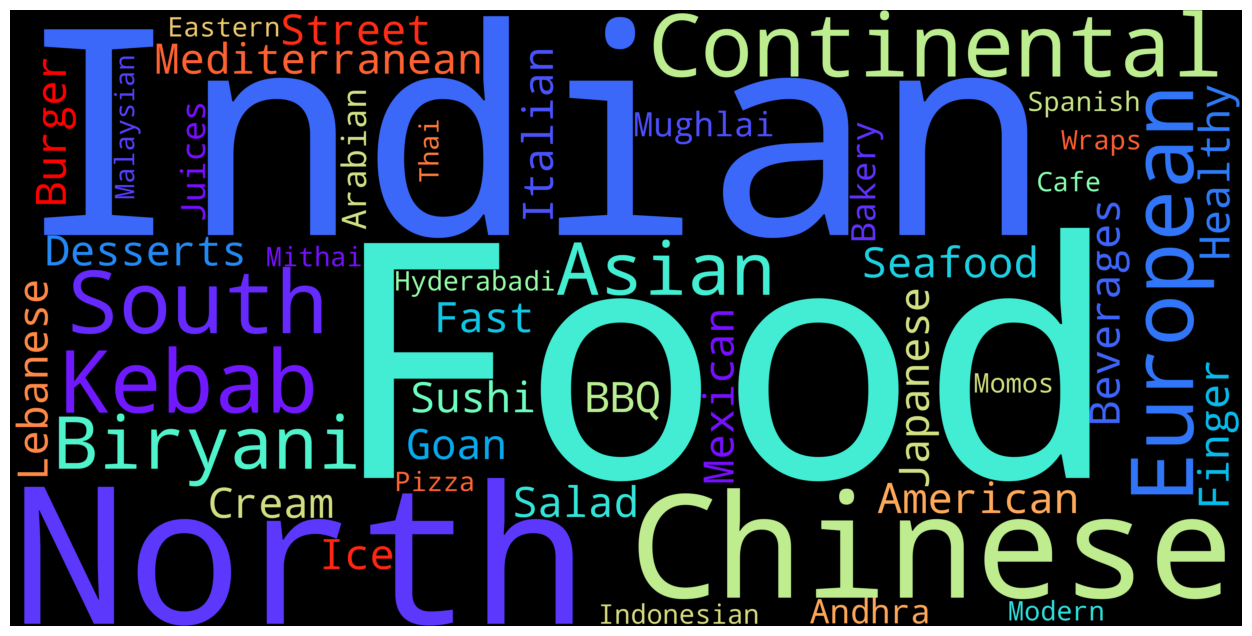

In [ ]:
#WordCloud for Cuisines

plt.figure(figsize = (20,8))
text = " ".join(name for name in cuisines_df.Cuisine)

word_cloud = WordCloud(width = 6000,height = 3000,collocations = False,colormap = 'rainbow',background_color = 'black').generate(text)

plt.imshow(word_cloud,interpolation = 'bilinear');
plt.axis("off");

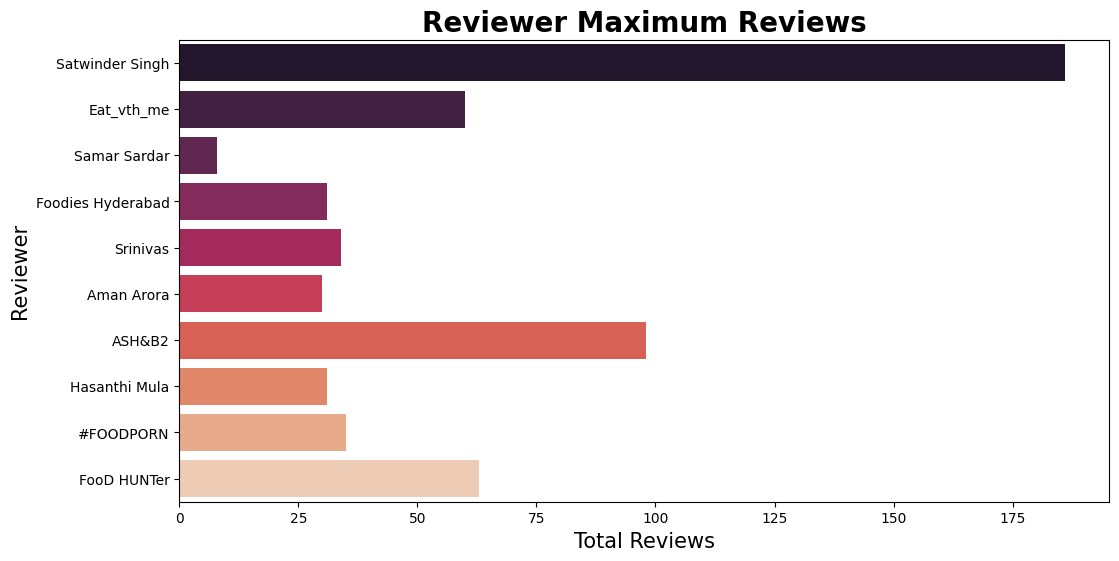

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = most_followed_reviewer[:10],x = 'Reviewer_Total_Review',y = 'Reviewer',palette = 'rocket')
plt.title('Reviewer Maximum Reviews',fontsize = 20,fontweight = 'bold')
plt.xlabel('Total Reviews',fontsize = 15)
plt.ylabel('Reviewer',fontsize = 15)
plt.show()

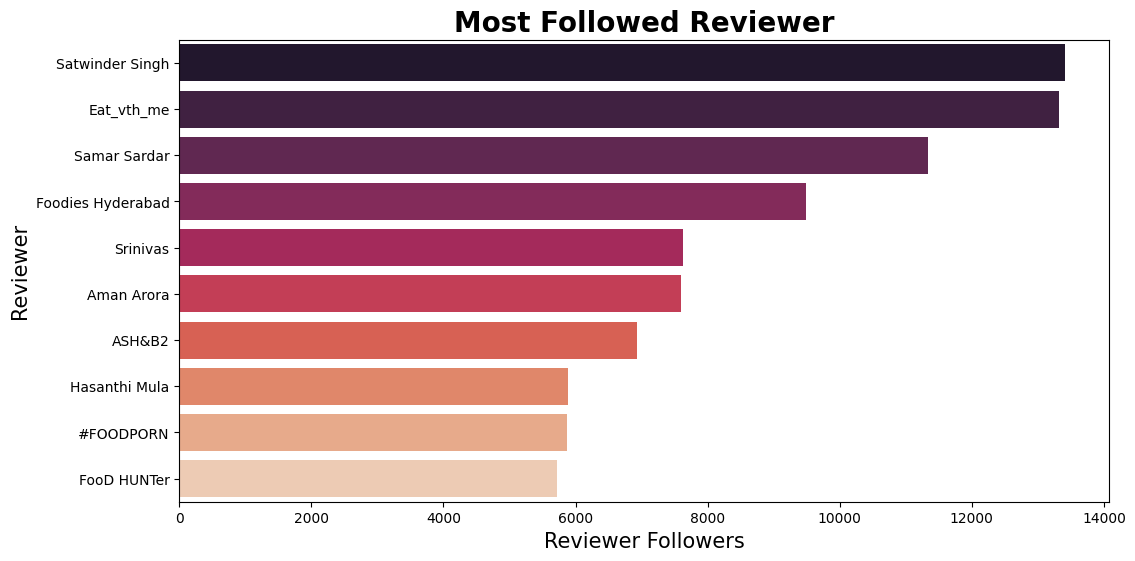

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = most_followed_reviewer[:10],x = 'Reviewer_Followers',y = 'Reviewer',palette = 'rocket')
plt.title('Most Followed Reviewer',fontsize = 20,fontweight = 'bold')
plt.xlabel('Reviewer Followers',fontsize = 15)
plt.ylabel('Reviewer',fontsize = 15)
plt.show()

In [ ]:
most_followed_reviewer

Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5463     Satwinder Singh                  186.0             13410.0   
1701          Eat_vth_me                   60.0             13320.0   
5235        Samar Sardar                    8.0             11329.0   
1787   Foodies Hyderabad                   31.0              9494.0   
6229            Srinivas                   34.0              7628.0   
...                  ...                    ...                 ...   
7422            Zomato 2                    1.0                 NaN   
7430     Ʀʌtʜoʀ Sɩŋʛʜ RT                    2.0                 NaN   
7431       Каоутар Тахри                    1.0                 NaN   
7435    দেবাশিষ মুখার্জি                    1.0                 NaN   
7438  ప్రత్యూష సూరేపల్లి                    1.0                 NaN   

      Average_Rating_Given  
5463              3.666667  
1701              5.000000  
5235              3.500000  
1787              4.500000  
6229              3.714286  
...                    ...  
7422              1.000000  
7430              5.000000  
7431              5.000000  
7435              5.000000  
7438              4.000000  

[7446 rows x 4 columns]

In [ ]:
avg_hotel_rating

Restaurant  Rating  Total_Review
1                        10 Downing Street    3.80           100
2                                 13 Dhaba    3.48           100
3           3B's - Buddies, Bar & Barbecue    4.76           100
4                AB's - Absolute Barbecues    4.88           100
5                        Absolute Sizzlers    3.62           100
..                                     ...     ...           ...
96              Urban Asia - Kitchen & Bar    3.65           100
97   Yum Yum Tree - The Arabian Food Court    3.56           100
98         Zega - Sheraton Hyderabad Hotel    4.45           100
99                Zing's Northeast Kitchen    3.65           100
100                                eat.fit    3.20           100

[100 rows x 3 columns]

#**5.Hypothesis Testing**

* The cost of a Restaurant is positively correlated with the Rating it receives

* Restaurants that are reviewed by reviewers with more followers will have a higher rating

* Restaurants that offer a wider variety of cuisines will have a higher Restaurant cost.

* Restaurants that offer a wider variety of cuisines will have a higher rating.



###Hypothetical Statement - 1
---

The Cost of a restaurant is positively correlated with the rating it receives.


#### 1. Satate Your research hypothesis as an null hypothesis and alternate

* **Null hypothesis:** There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)

* **Alternative hypothesis:** There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

* **Test:** Simple Linear Regressinon Analysis

In [ ]:
#Perform Statistical Test to obtain P-value
import statsmodels.formula.api as smf

#fit the linear model
model = smf.ols(formula ='Rating ~ Cost',data = merged).fit()

#Check the P-value of coeffiecient
p_value = model.pvalues[1]
if p_value < 0.05:
  print("Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it recives.")
else:
  print("Fail to reject Null Hypothesis - There is a positive relationship between the cost of a restaurant and the rating it recives")


Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it recives.


### Hypothetical Statement - 2

---
Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. Satate Your research hypothesis as an null hypothesis and alternate

* **Null hypothesis:** The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0)

* **Alternative hypothesis:** Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)

* **Test:** Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data =merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


### Hypothetical Statement - 3

---

Restaurants that offer a wider variety of cuisines will have a higher Restaurant cost.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The variety of cuisines offered by a restaurant has no effect on its Restaurant Cost. (H0: 𝛽3 = 0)

* **Alternative hypothesis:** The variety of cuisines offered by a restaurant has a positive effect in Restaurant Cost. (H1: 𝛽3 > 0)

* **Test:** Chi-Squared Test

#### 2. Perform an appropriate statistical test.


In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Cost'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


## **6.Feature Engineering and Data-Preprocessing**

### `Treating Duplicates`

In [ ]:
restaurant_df.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
hotel = restaurant_df.copy()

In [ ]:
# Convert the 'Time' column in the 'review' DataFrame to datetime format using the specified format.
review['Time'] = pd.to_datetime(review['Time'], format='%m/%d/%Y %H:%M')

# Split the 'Metadata' column into two separate columns based on the first comma (',').
review[['Reviewer_Total_Review', 'Review_Followers']] = review['Metadata'].str.split(',', n=1, expand=True)

# Extract the numeric part of 'Reviewer_Total_Review' and convert it to a numeric data type.
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])

# Extract the numeric part of 'Review_Followers' and convert it to a numeric data type.
review['Reviewer_Followers'] = pd.to_numeric(review['Review_Followers'].str.split(' ').str[1])

# Convert the 'Time' column to datetime format again (redundant conversion).
review['Time'] = pd.to_datetime(review['Time'])

# Extract the year from the 'Time' column and create a new 'Review_year' column.
review['Review_year'] = pd.DatetimeIndex(review['Time']).year

# Extract the month from the 'Time' column and create a new 'Review_Month' column.
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month

# Extract the day from the 'Time' column and create a new 'Review_Day' column.
review['Review_Day'] = pd.DatetimeIndex(review['Time']).day

# Extract the hour from the 'Time' column and create a new 'Review_Hour' column.
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour

### `Treating Missing Values`

Restaurant Dataset

---

In [ ]:
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
hotel[hotel['Timings'].isnull()]

Restaurant                                              Links Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...  900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [ ]:
hotel['Timings'].fillna(hotel['Timings'].mode()[0],inplace = True)

In [ ]:
#Checking null values percentage in collections
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in collections is {round(missing_percentage,2)}%')

Percentage of missing value in collections is 51.43%


In [ ]:
#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)

In [ ]:
print(hotel.isnull().sum())
print(':'*120)

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


Review Dataset

---

In [ ]:
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      0
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       2
Review_Followers         1580
Reviewer_Followers       1580
Review_year                 2
Review_Month                2
Review_Day                  2
Review_Hour                 2
dtype: int64

In [ ]:
review[review['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     4.0      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     4.0      NaN  NaT         0   

      Reviewer_Total_Review Review_Followers  Reviewer_Followers  Review_year  \
8777                    NaN              NaN                 NaN          NaN   
9085                    NaN              NaN                 NaN          NaN   

      Review_Month  Review_Day  Review_Hour  
8777           NaN         NaN          NaN  
9085           NaN         NaN          NaN

In [ ]:
review[review['Reviewer_Total_Review'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     4.0      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     4.0      NaN  NaT         0   

      Reviewer_Total_Review Review_Followers  Reviewer_Followers  Review_year  \
8777                    NaN              NaN                 NaN          NaN   
9085                    NaN              NaN                 NaN          NaN   

      Review_Month  Review_Day  Review_Hour  
8777           NaN         NaN          NaN  
9085           NaN         NaN          NaN

In [ ]:
review = review.dropna(subset = ['Reviewer','Reviewer_Total_Review'])

In [ ]:
review = review.fillna({'Review':'No Review','Reviewer_Followers':0})

In [ ]:
review.drop('Review_Followers',axis = 1,inplace = True)

In [ ]:
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_year              0
Review_Month             0
Review_Day               0
Review_Hour              0
dtype: int64

In [ ]:
#merging both dataset
_merged_df = hotel.merge(review, on = 'Restaurant')
_merged_df.shape

(9961, 17)

In [ ]:
_merged_df['Cost']=_merged_df['Cost'].apply(lambda x:x.replace(',',''))

In [ ]:
#converting 'Cost' column values to integer
_merged_df['Cost']=_merged_df['Cost'].astype(int)


In [ ]:
hotel['Cost']=hotel['Cost'].apply(lambda x:x.replace(',',''))
hotel['Cost']=hotel['Cost'].astype(int)


###2. Handling Outliers

#### Detecting Anamoly

In [ ]:
_merged_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750])

In [ ]:
_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Restaurant             9961 non-null   object        
 1   Links                  9961 non-null   object        
 2   Cost                   9961 non-null   int64         
 3   Cuisines               9961 non-null   object        
 4   Timings                9961 non-null   object        
 5   Reviewer               9961 non-null   object        
 6   Review                 9961 non-null   object        
 7   Rating                 9961 non-null   float64       
 8   Metadata               9961 non-null   object        
 9   Time                   9961 non-null   datetime64[ns]
 10  Pictures               9961 non-null   int64         
 11  Reviewer_Total_Review  9961 non-null   float64       
 12  Reviewer_Followers     9961 non-null   float64       
 13  Rev

In [ ]:
from sklearn.ensemble import IsolationForest

print("Skewness - Cost: %f" % _merged_df['Cost'].skew())
print("Kurtosis - Cost: %f" % _merged_df['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % _merged_df['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % _merged_df['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


In [ ]:
#IsolationForest for anomaly detection on Cost feature

isolation_forest = IsolationForest(n_estimators = 100,contamination = 0.01)
isolation_forest.fit(_merged_df['Cost'].values.reshape(-1,1))
_merged_df['anomaly_score_univariate_cost'] = isolation_forest.decision_function(_merged_df['Cost'].values.reshape(-1,1))
_merged_df['outlier_univariate_cost'] = isolation_forest.predict(_merged_df['Cost'].values.reshape(-1,1))

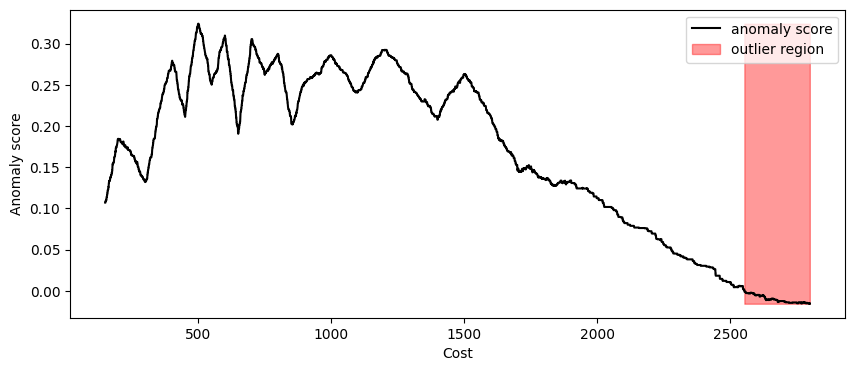

In [ ]:
#chart to visualize outliers
xx = np.linspace(_merged_df['Cost'].min(),_merged_df['Cost'].max(),len(_merged_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize = (10,4))
plt.plot(xx,anomaly_score,label= 'anomaly score',color = 'black')
plt.fill_between(xx.T[0],np.min(anomaly_score),np.max(anomaly_score),where = outlier == -1,color = 'red',alpha = .4,label = 'outlier region')
plt.legend()
plt.ylabel('Anomaly score')
plt.xlabel('Cost')
plt.show()

In [ ]:
#IsolationForest for Anomaly detiction for reviewer follower

isolation_forest = IsolationForest(n_estimators = 100,contamination = 0.01)
isolation_forest.fit(_merged_df['Reviewer_Followers'].values.reshape(-1,1))
_merged_df['anomaly_score_univariate_follower'] = isolation_forest.decision_function(_merged_df['Reviewer_Followers'].values.reshape(-1,1))
_merged_df['outlier_univariate_follower'] = isolation_forest.predict(_merged_df['Reviewer_Followers'].values.reshape(-1,1))

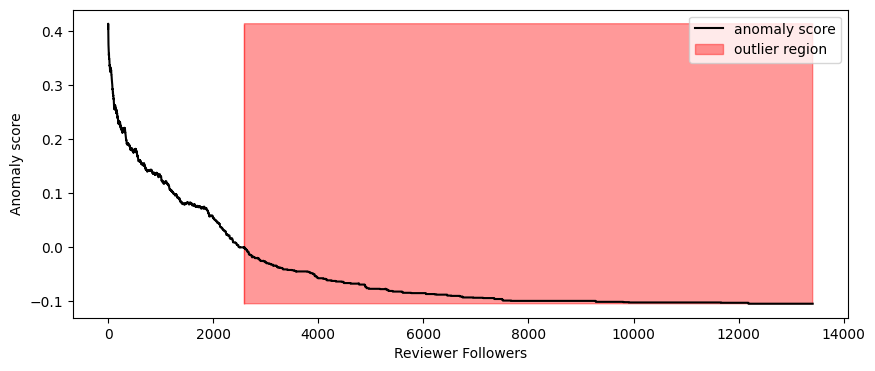

In [ ]:
#chart to visualize outliers in reviewer followers feature
xx = np.linspace(_merged_df['Reviewer_Followers'].min(),_merged_df['Reviewer_Followers'].max(),len(_merged_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize = (10,4))
plt.plot(xx,anomaly_score,label= 'anomaly score',color = 'black')
plt.fill_between(xx.T[0],np.min(anomaly_score),np.max(anomaly_score),where = outlier == -1,color = 'red',alpha = .4,label = 'outlier region')
plt.legend()
plt.ylabel('Anomaly score')
plt.xlabel('Reviewer Followers')
plt.show()

### Teating Outlier

In [ ]:
symmetric_feature = []
non_symmetric_feature = []
for i in _merged_df.describe().columns:
  if i != 'Time':
    if abs(_merged_df[i].mean() - _merged_df[i].median()) < 0.2:
      symmetric_feature.append(i)
    else:
      non_symmetric_feature.append(i)
  else:
    continue

print("Symmetric Distributed Features: -",symmetric_feature)

print("Skew symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features: - ['Review_Day', 'anomaly_score_univariate_cost', 'outlier_univariate_cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_year', 'Review_Month', 'Review_Hour']


In [ ]:
def outlier_treatment_skew_features(df,feature):
  IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  lower_wisker = df[feature].quantile(0.25) - 1.5*IQR
  upper_wisker = df[feature].quantile(0.75) + 1.5*IQR
  return upper_wisker,lower_wisker

In [ ]:
#upper limit capping
hotel.loc[hotel['Cost'] > outlier_treatment_skew_features(df=hotel,feature='Cost')[0],'Cost'] = outlier_treatment_skew_features(df=hotel,feature='Cost')[0]
#lower limit capping
hotel.loc[hotel['Cost'] < outlier_treatment_skew_features(df=hotel,feature='Cost')[1],'Cost'] = outlier_treatment_skew_features(df=hotel,feature='Cost')[1]


In [ ]:
#upper limit capping
review.loc[review['Reviewer_Followers'] > outlier_treatment_skew_features(df=review,feature='Reviewer_Followers')[0],'Reviewer_Followers'] = outlier_treatment_skew_features(df=review,feature='Reviewer_Followers')[0]
#lower limit capping
review.loc[review['Reviewer_Followers'] < outlier_treatment_skew_features(df=review,feature='Reviewer_Followers')[1],'Reviewer_Followers'] = outlier_treatment_skew_features(df=review,feature='Reviewer_Followers')[1]


In [ ]:
#Droping the columns
_merged_df.drop(columns = ['anomaly_score_univariate_cost','outlier_univariate_cost','anomaly_score_univariate_follower','outlier_univariate_follower'],inplace = True)

In [ ]:
_merged_df.sample(3)

Restaurant  \
6482        Hyderabad Chefs   
6888  The Tilt Bar Republic   
6094             PourHouse7   

                                                  Links  Cost  \
6482  https://www.zomato.com/hyderabad/hyderabad-che...   600   
6888          https://www.zomato.com/thetiltbarrepublic  1500   
6094  https://www.zomato.com/hyderabad/pourhouse7-ga...  1200   

                                         Cuisines  \
6482                        North Indian, Chinese   
6888           North Indian, Continental, Italian   
6094  North Indian, Continental, Chinese, Italian   

                                                Timings             Reviewer  \
6482                                12 Noon to 10:30 PM           Daily Life   
6888                     12noon to 12midnight (Mon-Sun)         Anil Pajjuri   
6094  12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon...  Avishek Chakraborty   

                                                 Review  Rating  \
6482                  not so good and it's not so spicy     2.0   
6888  Nice ambience , good food. Got discount for zo...     4.0   
6094  If you want to visit a place which will have a...     3.0   

                        Metadata                Time  Pictures  \
6482                    1 Review 2018-07-09 21:29:00         0   
6888   30 Reviews , 37 Followers 2018-09-26 14:44:00         0   
6094  38 Reviews , 172 Followers 2019-02-09 17:36:00         0   

      Reviewer_Total_Review  Reviewer_Followers  Review_year  Review_Month  \
6482                    1.0                 0.0       2018.0           7.0   
6888                   30.0                37.0       2018.0           9.0   
6094                   38.0               172.0       2019.0           2.0   

      Review_Day  Review_Hour  
6482         9.0         21.0  
6888        26.0         14.0  
6094         9.0         17.0

## 3. Categorical Encoding

In [ ]:
hotel.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
hotel['Cuisines'][0].split(',')

['Chinese',
 ' Continental',
 ' Kebab',
 ' European',
 ' South Indian',
 ' North Indian']

In [ ]:
hotel['Cuisines_list'] = hotel['Cuisines'].apply(lambda x: x.split(','))

In [ ]:
cluster_dummy = hotel[['Restaurant','Cuisines_list']]
cluster_dummy = cluster_dummy.explode('Cuisines_list')
cluster_dummy['Cuisines_list'] = cluster_dummy['Cuisines_list'].apply(lambda x: x.strip())
cluster_dummy = pd.get_dummies(cluster_dummy,columns = ['Cuisines_list'],prefix = ['Cuisines'])
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [ ]:
cluster_dummy.head()

Restaurant  American  Andhra  Arabian  Asian  BBQ  \
0               10 Downing Street         0       0        0      0    0   
1                        13 Dhaba         0       0        0      0    0   
2  3B's - Buddies, Bar & Barbecue         0       0        0      0    0   
3       AB's - Absolute Barbecues         0       0        0      0    0   
4               Absolute Sizzlers         1       0        0      0    0   

   Bakery  Beverages  Biryani  Burger  ...  North Indian  Pizza  Salad  \
0       0          0        0       0  ...             1      0      0   
1       0          0        0       0  ...             1      0      0   
2       0          0        0       0  ...             1      0      0   
3       0          0        0       0  ...             1      0      0   
4       0          0        0       0  ...             0      0      0   

   Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0        0             0        0            0      0     0      0  
1        0             0        0            0      0     0      0  
2        0             0        0            0      0     0      0  
3        0             0        0            0      0     0      0  
4        0             0        0            0      0     0      0  

[5 rows x 45 columns]

In [ ]:
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x: len(x.split(',')))

In [ ]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'},inplace = True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.sample(2)

Restaurant  \
40                            Frio Bistro   
62  Shree Santosh Dhaba Family Restaurant   

                                                Links  Cost  \
40  https://www.zomato.com/hyderabad/frio-bistro-g...  1200   
62  https://www.zomato.com/hyderabad/shree-santosh...   500   

                                   Cuisines                   Timings  \
40  European, Italian, Continental, Spanish  12noon to 11pm (Mon-Sun)   
62         North Indian, Chinese, Fast Food         11 AM to 11:30 PM   

                                   Cuisines_list  Total_Cuisine_Count  \
40  [European,  Italian,  Continental,  Spanish]                    4   
62          [North Indian,  Chinese,  Fast Food]                    3   

    Average_Rating  
40            3.61  
62            2.83

In [ ]:
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(cluster_dummy, on = 'Restaurant')

In [ ]:
cluster_dummy.shape

(100, 48)

In [ ]:
cluster_dummy.head(3).T

0         1         2
Restaurant           Beyond Flavours  Paradise  Flechazo
Cost                             800       800      1300
Average_Rating                  4.28       4.7      4.66
Total_Cuisine_Count                6         3         4
American                           0         0         0
Andhra                             0         0         0
Arabian                            0         0         0
Asian                              0         0         1
BBQ                                0         0         0
Bakery                             0         0         0
Beverages                          0         0         0
Biryani                            0         1         0
Burger                             0         0         0
Cafe                               0         0         0
Chinese                            1         1         0
Continental                        1         0         0
Desserts                           0         0         1
European                           1         0         0
Fast Food                          0         0         0
Finger Food                        0         0         0
Goan                               0         0         0
Healthy Food                       0         0         0
Hyderabadi                         0         0         0
Ice Cream                          0         0         0
Indonesian                         0         0         0
Italian                            0         0         0
Japanese                           0         0         0
Juices                             0         0         0
Kebab                              1         0         0
Lebanese                           0         0         0
Malaysian                          0         0         0
Mediterranean                      0         0         1
Mexican                            0         0         0
Mithai                             0         0         0
Modern Indian                      0         0         0
Momos                              0         0         0
Mughlai                            0         0         0
North Eastern                      0         0         0
North Indian                       1         1         1
Pizza                              0         0         0
Salad                              0         0         0
Seafood                            0         0         0
South Indian                       1         0         0
Spanish                            0         0         0
Street Food                        0         0         0
Sushi                              0         0         0
Thai                               0         0         0
Wraps                              0         0         0

## 4. Textual Data Preprocessing - Review data

In [ ]:
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
sentiment_df.sample(2)

Reviewer      Restaurant  Rating  \
8860  Dishang Valotia  Domino's Pizza     5.0   
5479    Jaswanth Desu  Asian Meal Box     1.0   

                                                 Review  
8860                                               fast  
5479  I ordered Veg Manchow soup, Chili Gobi, Noodle...

In [ ]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [ ]:
sentiment_df.sample(2)

index               Reviewer  \
9185   9185  Arpita Bose Chaudhury   
2162   2162             Rajjit Das   

                                             Restaurant  Rating  \
9185               Collage - Hyatt Hyderabad Gachibowli     5.0   
2162  Jonathan's Kitchen - Holiday Inn Express & Suites     4.0   

                                                 Review  
9185  Wonderful ambience, great customer service and...  
2162  I went there for lunch on a Sunday afternoon. ...

In [ ]:
!pip install contractions

In [ ]:
import contractions

sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: contractions.fix(x))

In [ ]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review  
0  The ambience was good, food was quite good . h...  
1  Ambience is too good for a pleasant evening. S...  
2  A must try.. great food great ambience. Thnx f...  
3  Soumen das and Arun was a great guy. Only beca...  
4  Food is good.we ordered Kodi drumsticks and ba...

In [ ]:
sentiment_df.shape

(9961, 5)

In [ ]:
import nltk
from nltk.corpus import stopwords


nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.tokenize.sonority_sequencing import punctuation
import re
import string

def transform_text(text):

  text = text.lower()

  text = re.sub(r'http\S+','',text)

  test = re.sub(r'\d+','',text)

  words = nltk.word_tokenize(text)

  words = [word for word in words if word.isalnum()]

  stopwords_set = stopwords.words('english')
  punctuation_set = set(string.punctuation)
  words = [word for word in words if word not in stopwords_set and punctuation_set]

  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

  return lemmatized_words


In [ ]:

def transform_clean_text(text):

  text = text.lower()

  text = re.sub(r'http\S+','',text)

  text = re.sub(r'\d+','',text)

  words = nltk.word_tokenize(text)

  words = [word for word in words if word.isalnum()]

  stopwords_set = stopwords.words('english')
  punctuation_set = set(string.punctuation)
  words = [word for word in words if word not in stopwords_set and punctuation_set]

  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

  return ' '.join(lemmatized_words)

In [ ]:
sentiment_df['Review_list'] = sentiment_df['Review'].apply(transform_text)
sentiment_df['cleaned_Review'] = sentiment_df['Review'].apply(transform_clean_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def cols_to_remove(df):
  cols = []
  for col in df.columns:
    try:
      int(col)
      cols.append(col)
    except:
      continue

  return cols


def cleaned_tweets_processing():

  tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words = 'english', max_df=0.7,min_df=70)
  tfidf_wm = tfidfvectorizer.fit_transform(sentiment_df['cleaned_Review'].values)
  tfidf_tokens = tfidfvectorizer.get_feature_names_out()
  df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

  trash_cols = cols_to_remove(df_tfidfvect)

  #Removing all the numeric columns
  df_tfidfvect.drop(columns=trash_cols,inplace=True)

  return df_tfidfvect

In [ ]:
x_tfidf = cleaned_tweets_processing()

In [ ]:
x_tfidf.head()

absolutely  actually  add  added  aloo   amazing  ambiance  ambience  \
0         0.0       0.0  0.0    0.0   0.0  0.000000       0.0  0.165753   
1         0.0       0.0  0.0    0.0   0.0  0.000000       0.0  0.213566   
2         0.0       0.0  0.0    0.0   0.0  0.332315       0.0  0.255217   
3         0.0       0.0  0.0    0.0   0.0  0.000000       0.0  0.000000   
4         0.0       0.0  0.0    0.0   0.0  0.000000       0.0  0.243348   

   apart  area  ...  wonderful  work  worst  worth  wrong  year  yes  \
0    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
1    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
2    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
3    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
4    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   

   yesterday  yummy  zomato  
0        0.0    0.0     0.0  
1        0.0    0.0     0.0  
2        0.0    0.0     0.0  
3        0.0    0.0     0.0  
4        0.0    0.0     0.0  

[5 rows x 524 columns]

In [ ]:
x_tfidf.shape

(9961, 524)

In [ ]:
cluster_dummy.shape

(100, 48)

### Feature Manipulation and Selection

#### Feature Manipulation

Returant

---

In [ ]:
hotel.shape

(100, 8)

In [ ]:
hotel.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  \
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)   
1                                     11 AM to 11 PM   
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM   
3                                    12 Noon to 2 AM   
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...   

                                       Cuisines_list  Total_Cuisine_Count  \
0  [Chinese,  Continental,  Kebab,  European,  So...                    6   
1                 [Biryani,  North Indian,  Chinese]                    3   
2  [Asian,  Mediterranean,  North Indian,  Desserts]                    4   
3  [Biryani,  North Indian,  Chinese,  Seafood,  ...                    5   
4  [Asian,  Continental,  North Indian,  Chinese,...                    5   

   Average_Rating  
0            4.28  
1            4.70  
2            4.66  
3            3.21  
4            4.34

In [ ]:
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Cuisines_list',
       'Total_Cuisine_Count', 'Average_Rating'],
      dtype='object')

In [ ]:
hotel = hotel.drop(columns = ['Links','Cuisines_list'])

In [ ]:
hotel.shape

(100, 6)

In [ ]:
mean_rating = sentiment_df['Rating'].mean()
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x > mean_rating else 0)

In [ ]:
mean_rating

3.601044071880333

In [ ]:
sentiment_df.sample(2)

index            Reviewer       Restaurant  Rating  \
8834   8834   Prathyusha Juluri   Domino's Pizza     4.0   
5360   5360  The Fit Foodie 😋😎🤑  Diners Pavilion     3.0   

                                                 Review  \
8834                                               good   
5360  Nice ambiance. Food is good to average nothing...   

                                            Review_list  \
8834                                             [good]   
5360  [nice, ambiance, food, good, average, nothing,...   

                                         cleaned_Review  Sentiment  
8834                                               good          1  
5360  nice ambiance food good average nothing write ...          0

In [ ]:
sentiment_df['Sentiment'].value_counts()

1    6274
0    3687
Name: Sentiment, dtype: int64

In [ ]:
cluster_dummy.head()

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  \
0                 Beyond Flavours   800            4.28                    6   
1                        Paradise   800            4.70                    3   
2                        Flechazo  1300            4.66                    4   
3  Shah Ghouse Hotel & Restaurant   800            3.21                    5   
4      Over The Moon Brew Company  1200            4.34                    5   

   American  Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  \
0         0       0        0      0    0       0  ...             1      0   
1         0       0        0      0    0       0  ...             1      0   
2         0       0        0      1    0       0  ...             1      0   
3         0       0        0      0    0       0  ...             1      0   
4         0       0        0      1    0       0  ...             1      0   

   Salad  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0      0        0             1        0            0      0     0      0  
1      0        0             0        0            0      0     0      0  
2      0        0             0        0            0      0     0      0  
3      0        1             0        0            0      0     0      0  
4      0        0             0        0            0      0     0      0  

[5 rows x 48 columns]

### Data Transformation

<Axes: xlabel='Cost', ylabel='Density'>

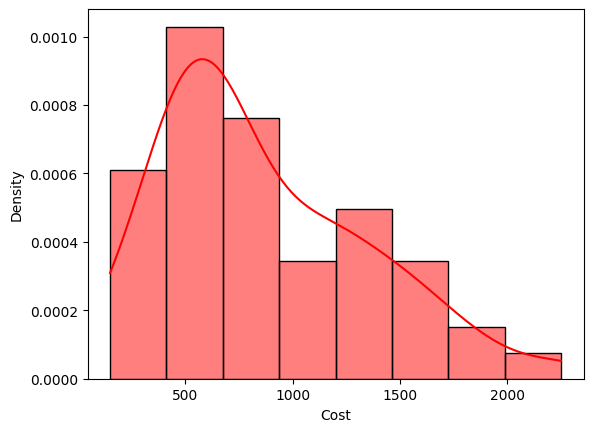

In [ ]:
sns.histplot(cluster_dummy['Cost'],stat = 'density',kde = True,color = 'red')

In [ ]:
cluster_dummy.sample(2)

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  American  Andhra  \
57  Being Hungry   450            3.66                    2         0       0   
63  Dine O China   850            3.37                    3         0       0   

    Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  Salad  Seafood  \
57        0      0    0       0  ...             1      0      0        0   
63        0      1    0       0  ...             0      0      0        0   

    South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
57             0        0            0      0     0      0  
63             0        0            0      0     0      0  

[2 rows x 48 columns]

In [ ]:
symmetry_check = cluster_dummy[['Cost','Average_Rating','Total_Cuisine_Count']]

In [ ]:
symmetric_features = []
non_symmetric_features = []
for i in symmetry_check.describe().columns:
  if abs(symmetry_check[i].mean() - symmetry_check[i].median() < 0.1):
    symmetric_features.append(i)
  else:
    non_symmetric_features.append(i)

print("Symmetric Distribution Features: -",symmetric_features)

print("Skew symmetric Distributed Features : -",non_symmetric_features)

Symmetric Distribution Features: - ['Average_Rating', 'Total_Cuisine_Count']
Skew symmetric Distributed Features : - ['Cost']


In [ ]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

Text(0.5, 1.0, 'Cost')

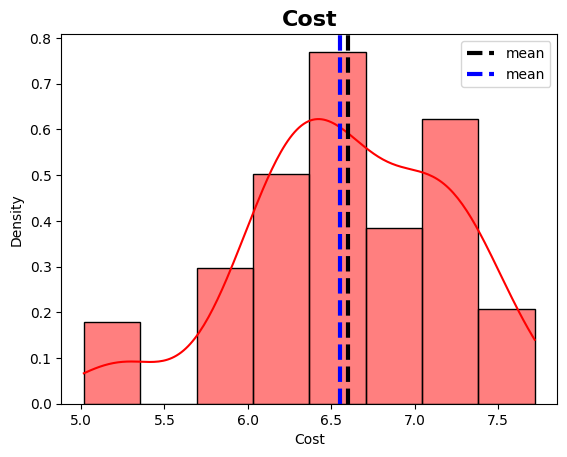

In [ ]:
sns.histplot(cluster_dummy['Cost'],stat = 'density',kde = True,color = 'red')
plt.axvline(cluster_dummy['Cost'].mean(),color = 'black',linestyle = 'dashed',linewidth = 3,label = 'mean')
plt.axvline(cluster_dummy['Cost'].median(),color = 'blue',linestyle = 'dashed',linewidth = 3,label = 'mean')
plt.legend(bbox_to_anchor = (1.0,1),loc = 'best')
plt.title('Cost',fontsize = 16,fontweight = 'bold')

### Data Scaling

In [ ]:
cluster_df = cluster_dummy.copy()

In [ ]:
cluster_df.sample(5)

Restaurant      Cost  Average_Rating  Total_Cuisine_Count  \
24                      SKYHY  7.244942            3.37                    3   
98                   Triptify  5.993961            3.55                    1   
96          Hyderabadi Daawat  6.398595            3.83                    3   
14  AB's - Absolute Barbecues  7.313887            4.88                    3   
50              Gal Punjab Di  6.685861            3.61                    2   

    American  Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  \
24         0       0        0      0    0       0  ...             1      0   
98         0       0        0      0    0       0  ...             1      0   
96         0       0        0      0    0       0  ...             0      0   
14         0       0        0      0    0       0  ...             1      0   
50         0       0        0      0    0       0  ...             1      0   

    Salad  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
24      0        0             0        0            0      0     0      0  
98      0        0             0        0            0      0     0      0  
96      0        0             0        0            0      0     0      0  
14      0        0             0        0            0      0     0      0  
50      0        0             0        0            0      0     0      0  

[5 rows x 48 columns]

In [ ]:
#Normalizing the numerical columns
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_df[numerical_cols])
scaled_df = cluster_df.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_df[numerical_cols])

### Dimensionality Reduction

In [ ]:
scaled_df.set_index(['Restaurant'],inplace = True)

In [ ]:
from sklearn.decomposition import PCA

features =  scaled_df.columns

pca = PCA()
pca.fit(scaled_df[features])



PCA()

Text(0, 0.5, 'cumulative explained variance')

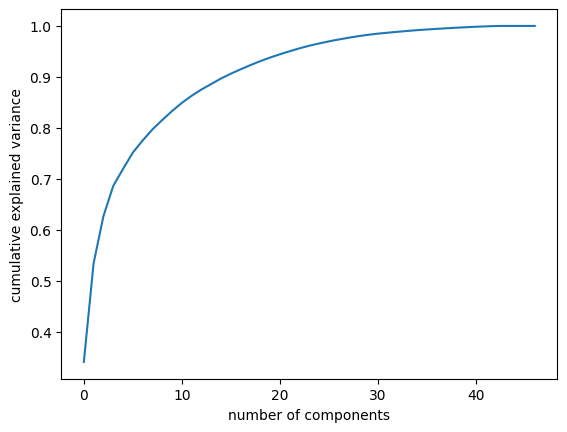

In [ ]:
#explained var v/s comp
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
#using n_components = 10
pca = PCA(n_components = 6)
pca.fit(scaled_df[features])

print('Explained Variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('\n')
print('Cumulative variance explained by 10 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

df_pca = pca.transform(scaled_df[features])

Explained Variation per principal component: [0.34148724 0.19364622 0.09196594 0.05928256 0.03338864 0.03193119]


Cumulative variance explained by 10 principal components: 75.17%


In [ ]:
print("Original shape: ",scaled_df.shape)
print("Transformed shape: ",df_pca.shape)

Original shape:  (100, 47)
Transformed shape:  (100, 6)


## Data Splitting

In [ ]:
X = x_tfidf
y = sentiment_df['Sentiment']

In [ ]:
sentiment_df.shape

(9961, 8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)

X_train:  (7968, 524)
X_test:  (1993, 524)


### Handling imbalance Dataset

In [ ]:
vc = sentiment_df['Sentiment'].value_counts().reset_index()

fig = px.pie(vc,values = "Sentiment",names = ["Positive Sentiment","Negative Sentiment"],title = 'Positive and Negative Sentiments Proportion', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9956   9956      Abhishek Mahajan  Chinese Pavilion     3.0   
9957   9957        Sharad Agrawal  Chinese Pavilion     4.5   
9958   9958             Ramandeep  Chinese Pavilion     1.5   
9959   9959       Nayana Shanbhag  Chinese Pavilion     4.0   
9960   9960      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  \
0     The ambience was good, food was quite good . h...   
1     Ambience is too good for a pleasant evening. S...   
2     A must try.. great food great ambience. Thnx f...   
3     Soumen das and Arun was a great guy. Only beca...   
4     Food is good.we ordered Kodi drumsticks and ba...   
...                                                 ...   
9956  Madhumathi Mahajan Well to start with nice cou...   
9957  This place has never disappointed us.. The foo...   
9958  Bad rating is mainly because of "Chicken Bone ...   
9959  I personally love and prefer Chinese Food. Had...   
9960  Checked in here to try some delicious chinese ...   

                                            Review_list  \
0     [ambience, good, food, quite, good, saturday, ...   
1     [ambience, good, pleasant, evening, service, p...   
2     [must, try, great, food, great, ambience, thnx...   
3     [soumen, da, arun, great, guy, behavior, since...   
4     [food, ordered, kodi, drumstick, basket, mutto...   
...                                                 ...   
9956  [madhumathi, mahajan, well, start, nice, court...   
9957  [place, never, disappointed, u, food, courteou...   
9958  [bad, rating, mainly, chicken, bone, found, ve...   
9959  [personally, love, prefer, chinese, food, coup...   
9960  [checked, try, delicious, chinese, food, seen,...   

                                         cleaned_Review  Sentiment  
0     ambience good food quite good saturday lunch c...          1  
1     ambience good pleasant evening service prompt ...          1  
2     must try great food great ambience thnx servic...          1  
3     soumen da arun great guy behavior sincerety go...          1  
4     food ordered kodi drumstick basket mutton biry...          1  
...                                                 ...        ...  
9956  madhumathi mahajan well start nice courteous s...          0  
9957  place never disappointed u food courteous staf...          1  
9958  bad rating mainly chicken bone found veg food ...          0  
9959  personally love prefer chinese food couple tim...          1  
9960  checked try delicious chinese food seen lunche...          0  

[9961 rows x 8 columns]

In [ ]:
vc

index  Sentiment
0      1       6274
1      0       3687

In [ ]:
#Calculating CIR

majority_calss = vc['Sentiment'][0]
minority_class = vc['Sentiment'][1]

CIR = majority_calss / minority_class
print("CIR: ",CIR)

CIR:  1.701654461621915


#7.ML Model Implementation

### KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i,init ="k-means++",random_state = 20 )
  km.fit(df_pca)
  wcss.append(km.inertia_)


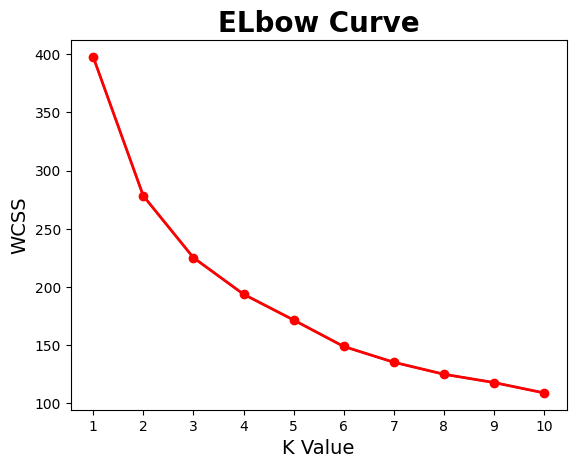

In [ ]:
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth = 2,color = "red",marker = "o")
plt.xlabel("K Value",fontsize= 14)
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS",fontsize = 14)
plt.title("ELbow Curve",fontsize = 20,fontweight = 'bold')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2,12):
  kmeans = KMeans(n_clusters = k,init = "k-means++",max_iter = 10000)
  kmeans.fit(df_pca)
  score = silhouette_score(df_pca,kmeans.labels_)
  silhouette_coefficients.append(score)
  print(f'n_clusters = {k}, silhouette Score : {score}')

n_clusters = 2, silhouette Score : 0.25728252607107793
n_clusters = 3, silhouette Score : 0.22722711288958727
n_clusters = 4, silhouette Score : 0.22977177662995557
n_clusters = 5, silhouette Score : 0.2376019047252107
n_clusters = 6, silhouette Score : 0.23880433716002145
n_clusters = 7, silhouette Score : 0.2348056681606025
n_clusters = 8, silhouette Score : 0.2296979215729993
n_clusters = 9, silhouette Score : 0.22865886286369616
n_clusters = 10, silhouette Score : 0.23101994154332423
n_clusters = 11, silhouette Score : 0.2277568164200526


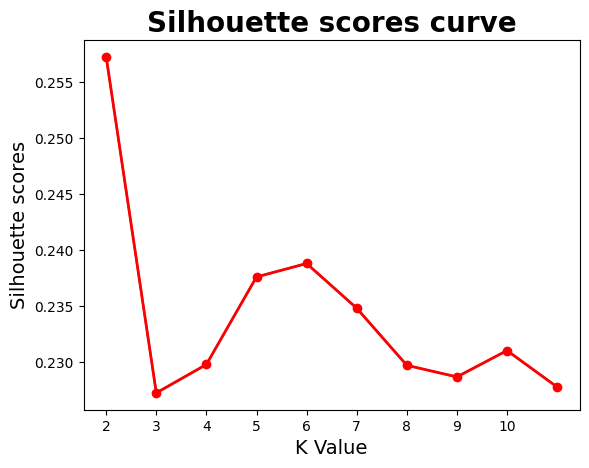

In [ ]:
plt.plot(range(2,12),silhouette_coefficients)
plt.plot(range(2,12),silhouette_coefficients,linewidth = 2,color = "red",marker = "o")
plt.xlabel("K Value",fontsize= 14)
plt.xticks(np.arange(2,11,1))
plt.ylabel("Silhouette scores",fontsize = 14)
plt.title("Silhouette scores curve",fontsize = 20,fontweight = 'bold')
plt.show()

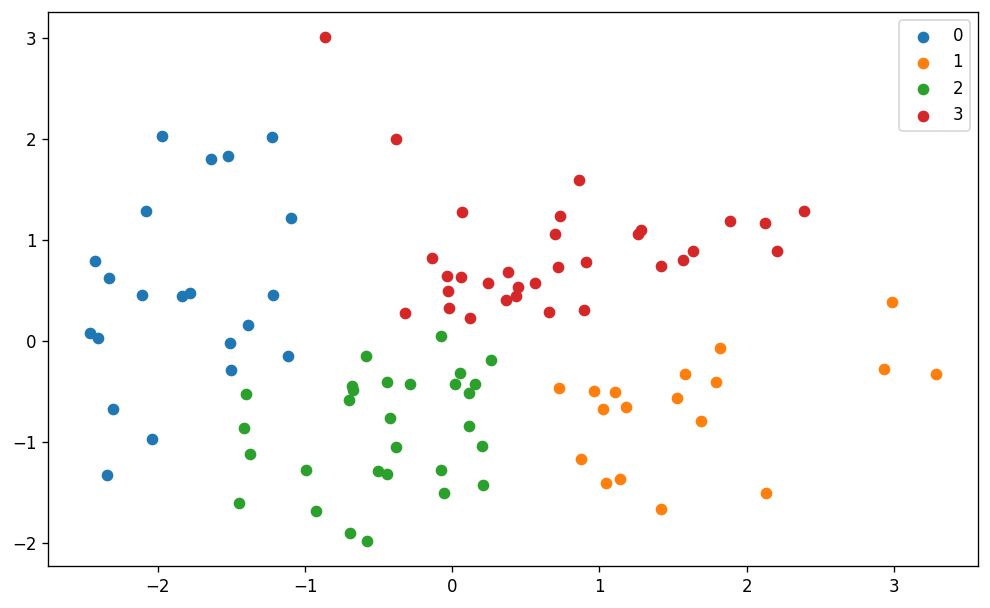

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state=42)
kmeans.fit(df_pca)

label = kmeans.fit_predict(df_pca)

unique_labels = np.unique(label)

plt.figure(figsize = (10,6), dpi = 120)
for i in unique_labels:
  plt.scatter(df_pca[label == i,0],df_pca[label == i,1],label = i)

plt.legend()
plt.show()

In [ ]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns = ['PC1','PC2','PC3','PC4','PC5','PC6'],index = scaled_df.index)
kmeans_pca_df['label'] = label
kmeans_pca_df.sample(5)

PC1       PC2       PC3       PC4  \
Restaurant                                                                      
Driven Cafe                            0.364372  0.398661  0.541292  0.843775   
KFC                                    1.792695 -0.409052 -0.490806  0.879299   
Mazzo - Marriott Executive Apartments -2.104206  0.452078 -0.091019  0.158183   
The Tilt Bar Republic                 -1.218124  0.456193 -0.853515  0.186150   
Shree Santosh Dhaba Family Restaurant  1.137897 -1.367774 -0.215684 -0.051589   

                                            PC5       PC6  label  
Restaurant                                                        
Driven Cafe                           -0.457275 -0.260388      3  
KFC                                   -0.177601 -0.281693      1  
Mazzo - Marriott Executive Apartments  0.259466 -0.373198      0  
The Tilt Bar Republic                  0.689272 -0.422298      0  
Shree Santosh Dhaba Family Restaurant -0.024133 -0.155050      1

In [ ]:
#joining the cluster labels to cluster_df DataFrame
cluster_df.set_index(['Restaurant'],inplace=True)
cluster_df = cluster_df.join(kmeans_pca_df['label'])
cluster_df.sample(3)

Cost  Average_Rating  \
Restaurant                                                   
Pista House                       6.908755            3.23   
Feast - Sheraton Hyderabad Hotel  7.719130            4.22   
Hotel Zara Hi-Fi                  5.993961            2.40   

                                  Total_Cuisine_Count  American  Andhra  \
Restaurant                                                                
Pista House                                         5         0       0   
Feast - Sheraton Hyderabad Hotel                    4         0       0   
Hotel Zara Hi-Fi                                    2         0       0   

                                  Arabian  Asian  BBQ  Bakery  Beverages  ...  \
Restaurant                                                                ...   
Pista House                             0      0    0       1          0  ...   
Feast - Sheraton Hyderabad Hotel        0      1    0       0          0  ...   
Hotel Zara Hi-Fi                        0      0    0       0          0  ...   

                                  Pizza  Salad  Seafood  South Indian  \
Restaurant                                                              
Pista House                           0      0        0             0   
Feast - Sheraton Hyderabad Hotel      0      0        0             0   
Hotel Zara Hi-Fi                      0      0        0             0   

                                  Spanish  Street Food  Sushi  Thai  Wraps  \
Restaurant                                                                   
Pista House                             0            0      0     0      0   
Feast - Sheraton Hyderabad Hotel        0            0      0     0      0   
Hotel Zara Hi-Fi                        0            0      0     0      0   

                                  label  
Restaurant                               
Pista House                           2  
Feast - Sheraton Hyderabad Hotel      0  
Hotel Zara Hi-Fi                      1  

[3 rows x 48 columns]

In [ ]:
cluster_df['Cost'] = np.expm1(cluster_df['Cost'])
cluster_df.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  American  \
Restaurant                                                                     
The Tilt Bar Republic  1500.0           3.845                    3         0   
Shanghai Chef 2         800.0           3.060                    4         0   

                       Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  \
Restaurant                                                             ...   
The Tilt Bar Republic       0        0      0    0       0          0  ...   
Shanghai Chef 2             0        0      1    0       0          0  ...   

                       Pizza  Salad  Seafood  South Indian  Spanish  \
Restaurant                                                            
The Tilt Bar Republic      0      0        0             0        0   
Shanghai Chef 2            0      0        0             0        0   

                       Street Food  Sushi  Thai  Wraps  label  
Restaurant                                                     
The Tilt Bar Republic            0      0     0      0      0  
Shanghai Chef 2                  0      0     1      0      2  

[2 rows x 48 columns]

In [ ]:
clustering_result = cluster_df.reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count','label']],on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...   800.0            4.28   
1                     Biryani, North Indian, Chinese   800.0            4.70   
2       Asian, Mediterranean, North Indian, Desserts  1300.0            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...   800.0            3.21   
4  Asian, Continental, North Indian, Chinese, Med...  1200.0            4.34   

   Total_Cuisine_Count  label  
0                    6      0  
1                    3      0  
2                    4      0  
3                    5      2  
4                    5      0

In [ ]:
cluster_count = cluster_df['label'].value_counts().reset_index().rename(columns = {'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

label  Total_Restaurant
3      1                18
2      0                21
1      2                29
0      3                32

In [ ]:
#creating new df for checkigng cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')

new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines    Cost  \
0                           Beyond Flavours       Chinese   800.0   
0                           Beyond Flavours      European   800.0   
91  Cascade - Radisson Hyderabad Hitec City       Italian  1800.0   
82                       Al Saba Restaurant  North Indian   750.0   
55                               Cafe Eclat          Cafe   700.0   

    Average_Rating  Total_Cuisine_Count  label  
0            4.280                    6      0  
0            4.280                    6      0  
91           4.260                    4      0  
82           3.155                    5      2  
55           3.590                    2      3

In [ ]:
#printing cuisine list for each cluster

for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster : ',cluster,'\n')
  print(new_cluster_df[new_cluster_df['label'] == cluster]['Cuisines'].unique(),'\n')
  print(':'*120)

Cuisine List for Cluster :  0 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Asian' 'Mediterranean' 'Desserts' 'Seafood' 'Goan' 'BBQ'
 'Japanese' 'Italian' 'Salad' 'Sushi' 'Spanish' 'Modern Indian'] 

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Cuisine List for Cluster :  2 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'American' 'Kebab' 'Italian' 'Finger Food'
 'Mexican' 'Salad' 'Andhra' 'Bakery' 'Mughlai' 'Juices' 'Arabian'
 'Hyderabadi' 'Thai' 'Indonesian' 'Asian' 'Momos' 'Japanese' 'Sushi'
 'Desserts' 'Cafe' 'Burger' 'Fast Food'] 

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Cuisine List for Cluster :  3 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'American' 'Continental'
 'Cafe' 'Bakery' 'Fast Food' 'Wraps' 'South Indian' '

### Hirarchical Clustering

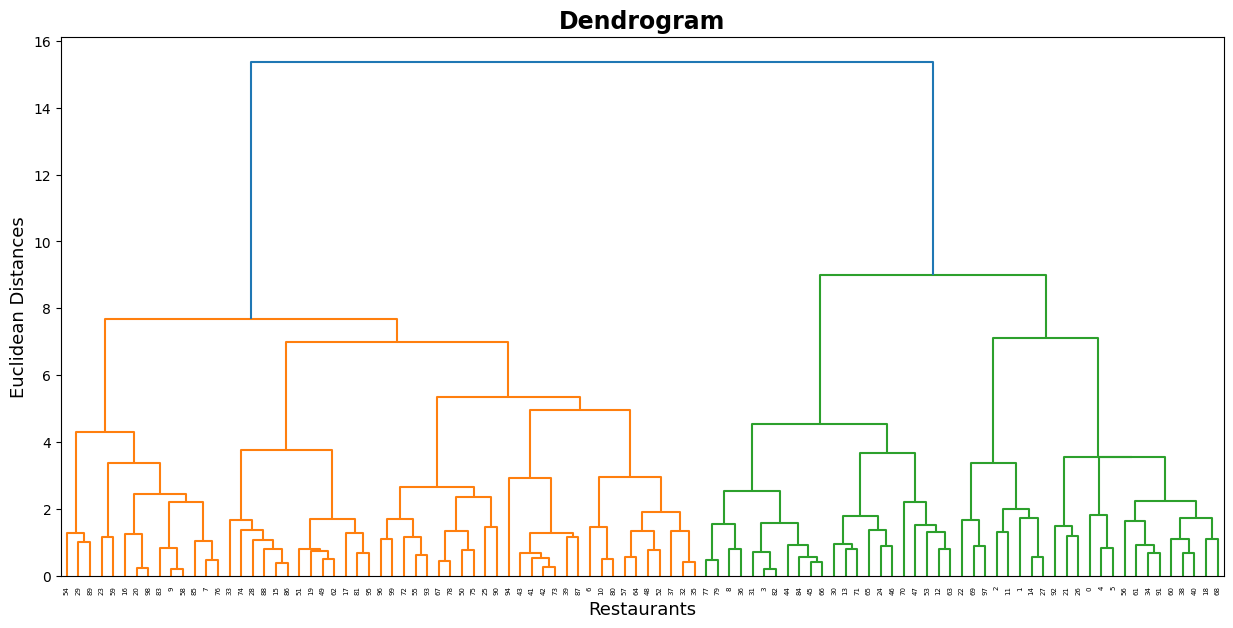

In [ ]:
import  scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,7))
dendrogram = sch.dendrogram(sch.linkage(df_pca,method = 'ward'))

plt.title('Dendrogram',fontsize = 17,fontweight = 'bold')
plt.xlabel('Restaurants',fontsize = 13)
plt.ylabel('Euclidean Distances',fontsize = 13)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = list(range(2,12))
for n_clusters in range_n_clusters:
  hc = AgglomerativeClustering(n_clusters = n_clusters,affinity = 'euclidean',linkage = 'ward')
  y_hc = hc.fit_predict(df_pca)
  score = silhouette_score(df_pca,y_hc)
  print("For n_clustes = {},silhouette score is {}".format(n_clusters,score))

For n_clustes = 2,silhouette score is 0.25126641704533836
For n_clustes = 3,silhouette score is 0.18416172410604248
For n_clustes = 4,silhouette score is 0.1612751272285635
For n_clustes = 5,silhouette score is 0.17254258290130142
For n_clustes = 6,silhouette score is 0.2026857610207043
For n_clustes = 7,silhouette score is 0.19102621064943107
For n_clustes = 8,silhouette score is 0.19378023870584138
For n_clustes = 9,silhouette score is 0.20513746841142302
For n_clustes = 10,silhouette score is 0.21339754138945
For n_clustes = 11,silhouette score is 0.23152498469585578


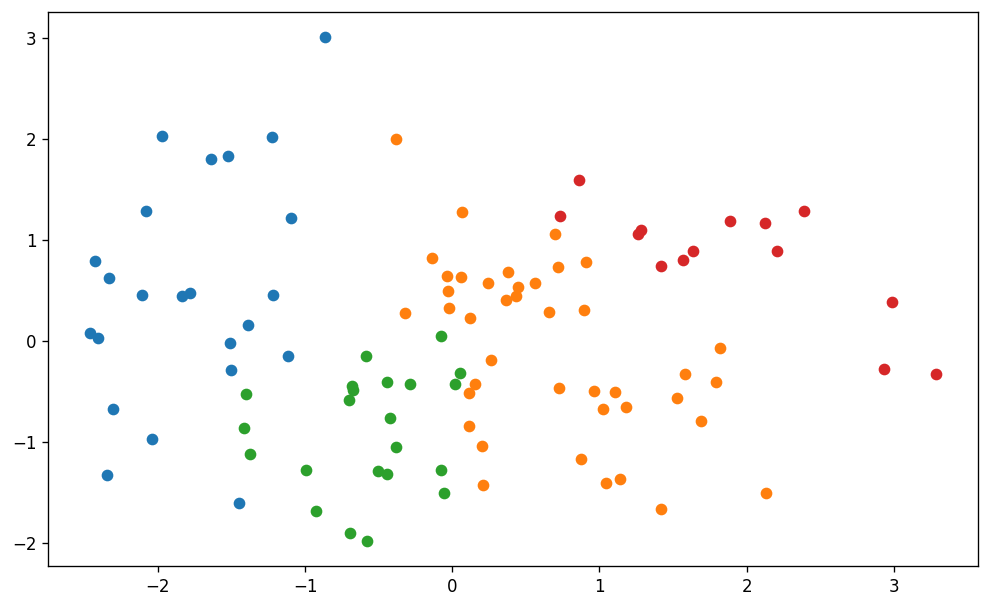

silhouette Coefficient: 0.161
davies_bouldin_score 1.628


In [ ]:
#agglomerative Clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

model = AgglomerativeClustering(n_clusters = 4)
y_hc = model.fit_predict(df_pca)
clusters = unique(y_hc)
plt.figure(figsize = (10,6), dpi = 120)

for cluster in clusters:

  row_ix = where(y_hc == cluster)

  plt.scatter(df_pca[row_ix,0],df_pca[row_ix,1])

plt.show()

print("silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc,metric = 'euclidean'))


from sklearn.metrics import davies_bouldin_score

print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca,y_hc))


In [ ]:
clustering_result['label_hr'] = y_hc

In [ ]:
clustering_result.sample(5)

Restaurant  \
46                            Ulavacharu   
92  Collage - Hyatt Hyderabad Gachibowli   
45                           Owm Nom Nom   
30                            Pot Pourri   
19                         Pakwaan Grand   

                                             Cuisines    Cost  Average_Rating  \
46                      Andhra, North Indian, Chinese  1400.0           3.225   
92  Continental, Italian, North Indian, Chinese, A...  2250.0           3.410   
45             Chinese, Biryani, Andhra, North Indian   900.0           3.290   
30                 Andhra, South Indian, North Indian   900.0           3.320   
19                     North Indian, Chinese, Biryani   400.0           2.710   

    Total_Cuisine_Count  label  label_hr  
46                    3      2         2  
92                    5      0         0  
45                    4      2         2  
30                    3      2         2  
19                    3      1         1

#Sentiment Analysis

In [ ]:
from tabulate import tabulate
from sklearn.metrics import (                       # Various metrics for model evaluation
    accuracy_score, classification_report, precision_score, recall_score,
    roc_auc_score, f1_score, confusion_matrix, make_scorer
)

def calculate_score(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  cm = confusion_matrix(y_test,y_pred)

  labels = ['Positive','Negative']
  cm = confusion_matrix(y_test,y_pred)
  # print(cm)

  ax = plt.subplot()
  sns.heatmap(cm,annot=True, cmap = 'Reds', fmt=".0f",ax=ax)

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()

  roc_auc = roc_auc_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  accuracy = accuracy_score(y_test,y_pred)

  table = [["ROC AUC",roc_auc],["Precision",precision],["Recall",recall],["F1",f1],["Accuracy",accuracy]]
  print(tabulate(table,headers = ["Metric","Score"]))

In [ ]:
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression()

#################### LOGISTIC REGRESSION###################### 



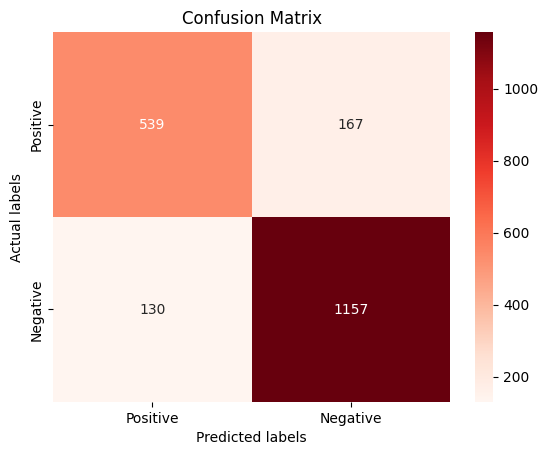

Metric        Score
---------  --------
ROC AUC    0.831223
Precision  0.873867
Recall     0.89899
F1         0.88625
Accuracy   0.850978


In [ ]:
print("#################### LOGISTIC REGRESSION######################",'\n')
calculate_score(clf1,X_train,y_train,X_test,y_test)

### **`XGBoost Classifier`**

In [ ]:
import xgboost
from xgboost import XGBClassifier

clf2 = XGBClassifier()

#################### XGBOOST CLASSFIER ###################### 



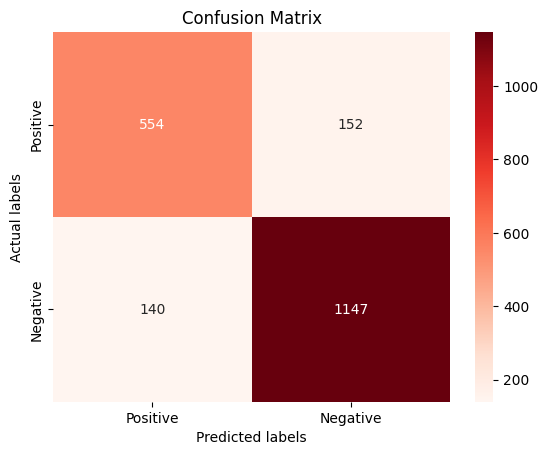

Metric        Score
---------  --------
ROC AUC    0.837961
Precision  0.882987
Recall     0.89122
F1         0.887084
Accuracy   0.853487


In [ ]:
print("#################### XGBOOST CLASSFIER ######################",'\n')
calculate_score(clf2,X_train,y_train,X_test,y_test)

### `SVM`

In [ ]:
from lightgbm import LGBMClassifier  # LightGBM classifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

clf3 = LGBMClassifier(random_state = 42)


#################### SVM CLASSFIER ###################### 

[LightGBM] [Info] Number of positive: 4987, number of negative: 2981
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32268
[LightGBM] [Info] Number of data points in the train set: 7968, number of used features: 524
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625879 -> initscore=0.514576
[LightGBM] [Info] Start training from score 0.514576


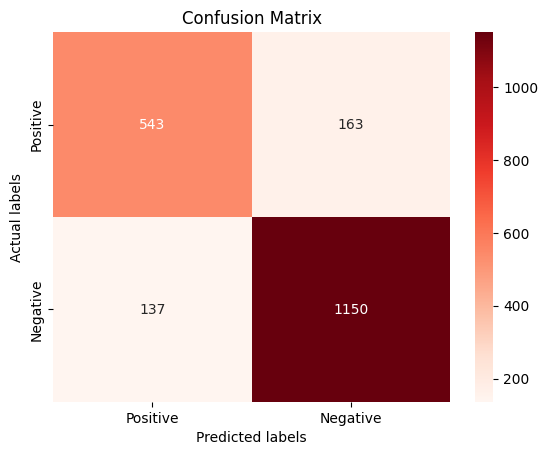

Metric        Score
---------  --------
ROC AUC    0.831336
Precision  0.875857
Recall     0.893551
F1         0.884615
Accuracy   0.849473


In [ ]:
print("#################### SVM CLASSFIER ######################",'\n')
calculate_score(clf3, X_train,y_train,X_test,y_test)

### Hyperparameter Tuning

### `Logistic Regression`

In [ ]:
from sklearn.model_selection import GridSearchCV

param_dict = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'max_iter': [1000]}
clf1_grid = GridSearchCV(clf1, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


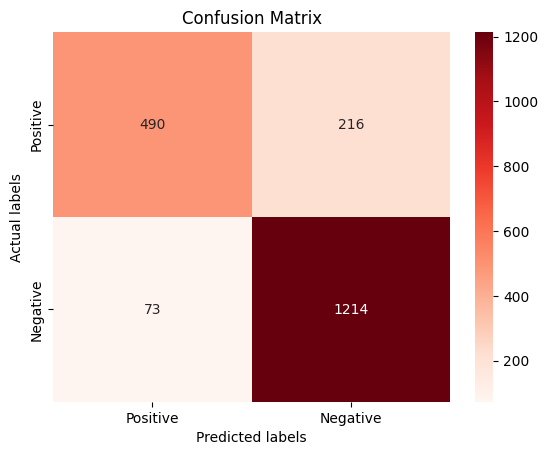

Metric        Score
---------  --------
ROC AUC    0.818665
Precision  0.848951
Recall     0.943279
F1         0.893633
Accuracy   0.854992


In [ ]:
calculate_score(clf1_grid,X_train,y_train,X_test,y_test)

### `XGBoost`

In [ ]:
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
clf2_grid=GridSearchCV(estimator=clf2,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



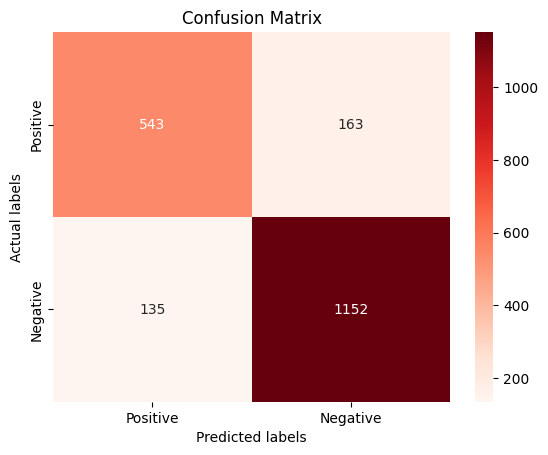

Metric        Score
---------  --------
ROC AUC    0.832113
Precision  0.876046
Recall     0.895105
F1         0.885473
Accuracy   0.850477


In [ ]:
calculate_score(clf2_grid,X_train,y_train,X_test,y_test)

### `LightGBM Classifier`

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

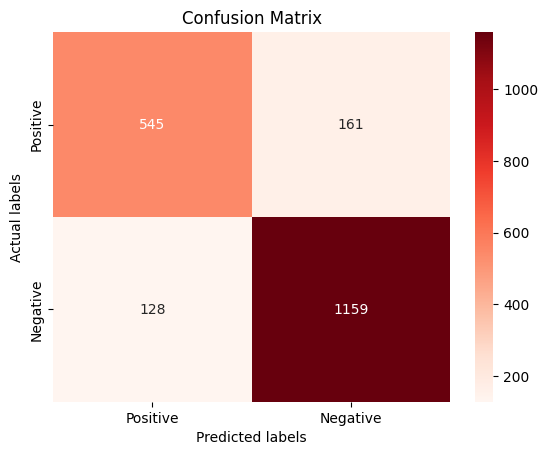

Metric        Score
---------  --------
ROC AUC    0.836249
Precision  0.87803
Recall     0.900544
F1         0.889145
Accuracy   0.854992


In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

param_grid_lgbm = {
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'max_depth': [5, 10, 15]
}
clf3_grid = GridSearchCV(clf3, param_grid=param_grid_lgbm, cv=3, scoring='f1_weighted')
calculate_score(clf3_grid,X_train,y_train,X_test,y_test)

In [ ]:
#####Best  model is LightGBM

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

log_reg_best = clf1_grid.best_estimator_
LGBM_best = clf3_grid.best_estimator_
xgb_best = clf2_grid.best_estimator_

lr_scores = log_reg_best.predict_proba(X_test)[:,1]
LGBM_scores = LGBM_best.predict_proba(X_test)[:,1]
xgb_scores = xgb_best.predict_proba(X_test)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC curve data for SVM model
LGBM_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, LGBM_scores)
LGBM_auc = roc_auc_score(y_test,LGBM_scores)


# Generate ROC curve data for XGB  model
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_scores)
xgb_auc = roc_auc_score(y_test, xgb_scores)


# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=LGBM_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'LGBM (Area = {LGBM_auc:.2f})'
)

# Generate a trace for the XGB  ROC curve
trace2 = go.Scatter(
    x=xgb_fpr,
    y=xgb_tpr,
    mode='lines',
    name=f'XGBoost (Area = {xgb_auc:.2f})'
)

# Diagonal line
trace3 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)


data = [trace0, trace1, trace2, trace3]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=1000,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


The LightGBM Classifier is performing quite well among  all the three Machine Leaning Models. So we select LightGBM Classifier as our Best MOdel



* Metric    ⏸    Score
---------      --------
* ROC AUC   -0.848448
* Precision -0.884675
* Recall    -0.902131
* F1        -0.893318
* Accuracy  -0.863021


# **Model Explanation**

In [ ]:
!pip install lime

In [ ]:
# LIME SECTION
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function

In [ ]:
feature_names = list(X_train.columns)

In [ ]:
X_train.head()

absolutely  actually  add  added  aloo   amazing  ambiance  ambience  \
2136         0.0       0.0  0.0    0.0   0.0  0.154137       0.0       0.0   
8518         0.0       0.0  0.0    0.0   0.0  0.000000       0.0       0.0   
5871         0.0       0.0  0.0    0.0   0.0  0.000000       0.0       0.0   
7129         0.0       0.0  0.0    0.0   0.0  0.000000       0.0       0.0   
800          0.0       0.0  0.0    0.0   0.0  0.319655       0.0       0.0   

      apart  area  ...  wonderful  work  worst     worth  wrong  year  yes  \
2136    0.0   0.0  ...        0.0   0.0    0.0  0.178202    0.0   0.0  0.0   
8518    0.0   0.0  ...        0.0   0.0    0.0  0.000000    0.0   0.0  0.0   
5871    0.0   0.0  ...        0.0   0.0    0.0  0.000000    0.0   0.0  0.0   
7129    0.0   0.0  ...        0.0   0.0    0.0  0.000000    0.0   0.0  0.0   
800     0.0   0.0  ...        0.0   0.0    0.0  0.000000    0.0   0.0  0.0   

      yesterday  yummy   zomato  
2136        0.0    0.0  0.00000  
8518        0.0    0.0  0.00000  
5871        0.0    0.0  0.00000  
7129        0.0    0.0  0.00000  
800         0.0    0.0  0.18974  

[5 rows x 524 columns]

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Assuming you have X_train as a Pandas DataFrame and feature_names as a list of column names
explainer = LimeTabularExplainer(X_train.values,
                                 mode="classification",  # Replace with "regression" if you're doing regression
                                 training_labels=None,  # Optional, provide training labels if available
                                 feature_names=feature_names,
                                 class_names=['0', '1'],
                                 discretize_continuous=True,  # Set to True if your data contains continuous features
                                 kernel_width=3)

In [ ]:
def predict_fn_LightGMB(data_batch):
    # Ensure data_batch is a 2D array with shape (n_samples, n_features)
    # For classification, return predicted probabilities
    return clf3_grid.predict_proba(data_batch)

In [ ]:
# Choose an observation from your test data (e.g., X_test[observation_index])
observation_index = 3  # Replace with the index of the observation you want to explain

data_row_to_test = X_test.values[observation_index]

# Explain the prediction for the chosen observation
exp = explainer.explain_instance(
    data_row_to_test,
   predict_fn_LightGMB,
    num_features=6  # You can adjust the number of features shown in the explanation
)

# Display the explanation (in a Jupyter Notebook)
exp.show_in_notebook(show_all=False)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
y_test.iloc[observation_index]

1

# **Conclusion**

The comprehensive analysis of the data, encompassing various facets of the restaurant industry in Hyderabad, has unearthed a wealth of valuable insights that hold significance for both restaurant proprietors and discerning customers. This conclusion will distill the key findings and implications from the two sections you've presented, providing a holistic perspective on the restaurant landscape in Hyderabad.

The analysis of data in the Hyderabad restaurant industry has revealed valuable insights for both restaurant owners and customers. Here's a concise summary of key findings:

**Restaurant Pricing & Trends:**
- Hyderabad offers a range of restaurant pricing, with some outliers.
- Pricing varies over time, reflecting market dynamics and competition.

**Day-of-Week and Time-of-Day Pricing:**
- Opportunities exist for strategic pricing on Wednesdays and Mondays.
- Fridays and Saturdays see lower prices, catering to weekend dining trends.
- Pricing varies by time of day to accommodate different customer needs.

**Customer Review Analysis & Influential Reviewers:**
- Customer reviews are diverse in length, emphasizing the need to cater to varying preferences.
- Influential reviewers like "Satwinder Singh" and "Eat_vth_me" have a significant impact on restaurant reputation.

**Restaurant Cost and Rating:**
- Higher-priced restaurants tend to have higher ratings, indicating perceived value.
- Some outliers combine high ratings with high prices for exceptional dining experiences.

**Revenue Expectations and Correlation Analysis:**
- Revenue potential varies among restaurants due to factors like branding and location.
- Correlation analysis reveals relationships between cost, ratings, and review metrics.

* **Advanced Analysis: Clustering, Sentiment Analysis, Topic Modeling, Machine Learning,Content Based Filtering Recommendation System and LIME Explanation:**
The integration of advanced analytics techniques, including clustering, sentiment analysis, topic modeling, machine learning, and LIME explanation, has ushered in a new era of understanding the restaurant landscape in Hyderabad.

  * **Clustering Analysis** allowed for the categorization of restaurants into distinct segments, providing restaurateurs with a clear framework for market positioning.

  * **Sentiment Analysis** has bridged the gap between customer feedback and actionable insights. By classifying reviews as positive or negative, this analysis offers restaurants a tool to gauge their performance and identify areas for improvement.

  * **Topic Modeling** unveiled underlying themes in reviews, offering a nuanced understanding of customer sentiments and preferences.

  * **Machine Learning** models, especially the SVM Classifier, have demonstrated their potential in predicting sentiment. This can serve as a predictive tool for restaurants to preemptively address customer concerns.
  * **Content Based Recommendation System:** The Content-Based Recommendation System is designed to provide personalized restaurant recommendations to reviewers. It accomplishes this by analyzing the reviews and the restaurants that reviewers have previously visited.This system leverages the content of the reviews, such as the text and sentiments expressed, to understand a reviewer's preferences and dining experiences. It then identifies similarities between these preferences and the attributes of other restaurants, such as cuisine type, location, and overall ratings. Based on these similarities, the system recommends restaurants that align with the reviewer's taste and past dining history

  * **LIME Explanation** enhances the interpretability of machine learning models, empowering restaurants to understand the factors influencing sentiment predictions.

In culmination, this comprehensive analysis amalgamates data-driven insights with advanced analytics techniques, providing a multi-dimensional view of Hyderabad's restaurant ecosystem. Restaurant owners can leverage these findings to optimize pricing strategies, enhance customer engagement, and refine their offerings. Customers, armed with knowledge about pricing trends, review sentiments, and influential reviewers, can make informed dining choices, ultimately elevating their culinary experiences. This project is a testament to the power of data-driven approaches in unraveling the intricacies of the restaurant industry and enhancing the dining experience for all stakeholders.Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***